In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [50]:
data = pd.read_csv('training_data.csv')
data

date        Bz        Dp  X_GSM_r    Y_GSM_r   Z_GSM_r  \
0      2007-04-21 23:35:24  1.325000  1.541882  2.04513  14.148948  2.828270   
1      2007-04-21 21:01:06  0.735000  1.684761  3.07664  13.420758  2.520253   
2      2007-04-24 12:48:05  0.555000  1.636927  3.25282  13.359627  3.881805   
3      2007-04-24 12:58:20  1.095000  1.821343  3.18863  13.395745  3.958515   
4      2007-04-24 15:34:45  0.770000  1.620260  2.11343  13.954823  4.071508   
...                    ...       ...       ...      ...        ...       ...   
34993  2015-12-24 17:36:35 -0.650000  2.419949  7.24000  -8.457936 -3.112683   
34994  2015-12-24 17:40:23 -1.975000  2.376666  7.32000  -8.360967 -3.025661   
34995  2015-12-29 23:53:24  0.440000  1.379989  8.50040  -8.115725 -4.066192   
34996  2015-12-29 23:55:00  0.436667  1.380572  8.54000  -8.110883 -4.098030   
34997  2015-12-29 23:55:47  0.405000  1.397073  8.55000  -8.114795 -4.132185   

               R          r     theta  
0      14.428854  14.573071  1.427248  
1      13.655344  13.997647  1.345445  
2      13.912155  14.287368  1.331962  
3      13.968386  14.327707  1.337112  
4      14.536652  14.689481  1.420491  
...          ...        ...       ...  
34993   9.012518  11.560410 -0.862829  
34994   8.891591  11.517065 -0.851685  
34995   9.077384  12.436065 -0.762252  
34996   9.087369  12.470440 -0.759632  
34997   9.106308  12.491091 -0.759289  

[34998 rows x 9 columns]

In [51]:
data['log_r'] = np.log(data['r'])
data['log_1_cos_T'] = np.log(1 + np.cos(data['theta']))
data

date        Bz        Dp  X_GSM_r    Y_GSM_r   Z_GSM_r  \
0      2007-04-21 23:35:24  1.325000  1.541882  2.04513  14.148948  2.828270   
1      2007-04-21 21:01:06  0.735000  1.684761  3.07664  13.420758  2.520253   
2      2007-04-24 12:48:05  0.555000  1.636927  3.25282  13.359627  3.881805   
3      2007-04-24 12:58:20  1.095000  1.821343  3.18863  13.395745  3.958515   
4      2007-04-24 15:34:45  0.770000  1.620260  2.11343  13.954823  4.071508   
...                    ...       ...       ...      ...        ...       ...   
34993  2015-12-24 17:36:35 -0.650000  2.419949  7.24000  -8.457936 -3.112683   
34994  2015-12-24 17:40:23 -1.975000  2.376666  7.32000  -8.360967 -3.025661   
34995  2015-12-29 23:53:24  0.440000  1.379989  8.50040  -8.115725 -4.066192   
34996  2015-12-29 23:55:00  0.436667  1.380572  8.54000  -8.110883 -4.098030   
34997  2015-12-29 23:55:47  0.405000  1.397073  8.55000  -8.114795 -4.132185   

               R          r     theta     log_r  log_1_cos_T  
0      14.428854  14.573071  1.427248  2.679175     0.133706  
1      13.655344  13.997647  1.345445  2.638889     0.201674  
2      13.912155  14.287368  1.331962  2.659376     0.212341  
3      13.968386  14.327707  1.337112  2.662195     0.208284  
4      14.536652  14.689481  1.420491  2.687132     0.139536  
...          ...        ...       ...       ...          ...  
34993   9.012518  11.560410 -0.862829  2.447586     0.500952  
34994   8.891591  11.517065 -0.851685  2.443830     0.506044  
34995   9.077384  12.436065 -0.762252  2.520601     0.544231  
34996   9.087369  12.470440 -0.759632  2.523361     0.545279  
34997   9.106308  12.491091 -0.759289  2.525016     0.545416  

[34998 rows x 11 columns]

In [52]:
from sklearn.linear_model import LinearRegression

def plot(data, Bz):
    log_r =np.array(data['log_r']).reshape(-1, 1)
    log_1_cos_T = np.array(data['log_1_cos_T']).reshape(-1, 1)


    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(log_1_cos_T, log_r)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The intercept
    print('Intercept: \n', regr.intercept_)

    x = np.arange(-5, 1.2, 0.1)
    y = regr.coef_[0][0]*x + regr.intercept_[0]

    # plot the linear regression line and the data
    plt.figure(figsize = (5, 3))
    plt.scatter(log_1_cos_T, log_r, alpha = 0.5, marker = '*',linewidths = 4)
    plt.plot(x, y, 'r')
    plt.xlabel(r'ln(1 + cos($\theta))$', fontsize = 15)
    plt.ylabel('ln(r)', fontsize = 15)
    plt.title(f'{Bz}\nData Number = {len(data)}\nln(r) = {regr.coef_[0][0]:.4f}* ln(1+cos(θ)) + {regr.intercept_[0]:.4f}', fontsize = 15, loc = 'left')
    plt.xlim(-5, 1.2)
    plt.ylim(1, 4)
    plt.show()    

    print('alpha = ', -regr.coef_[0][0])
    print('r0 = ', np.exp(regr.intercept_[0] + regr.coef_[0][0]*np.log(2)))

    alpha = -regr.coef_[0][0]
    r0 = np.exp(regr.intercept_[0] + regr.coef_[0][0]*np.log(2))
    theta = np.linspace(0, 170, 250)*np.pi/180
    r = r0*(2 / (1 + np.cos(theta)))**(alpha)
    x_p = r*np.cos(theta)
    y_p = r*np.sin(theta)
    plt.figure(figsize = (5, 3))
    plt.scatter(data['X_GSM_r'], data['R'], alpha = 0.5, marker = '*',linewidths = 4)
    plt.plot(x_p, y_p, 'r')
    plt.xlabel('XGSM', fontsize = 15)
    plt.ylabel('R', fontsize = 15)
    plt.title(f'{Bz}\nData Number = {len(data)}\nalpha = {-regr.coef_[0][0]:.4f}\nr0 = {np.exp(regr.intercept_[0] + regr.coef_[0][0]*np.log(2)):.4f}', fontsize = 15, loc = 'left')
    plt.xlim(-40, 20)
    plt.ylim(0, 30)
    plt.show()

    return alpha, r0 

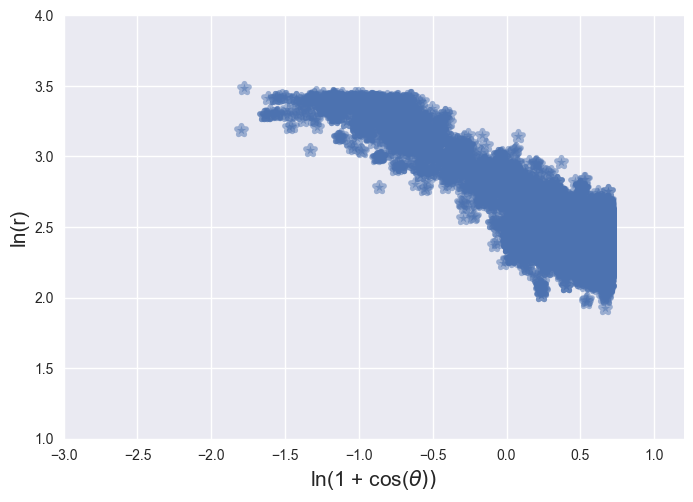

In [53]:
plt.scatter(data['log_1_cos_T'], data['log_r'], alpha = 0.5, marker = '*',linewidths = 4)
plt.xlabel(r'ln(1 + cos($\theta))$', fontsize = 15)
plt.ylabel('ln(r)', fontsize = 15)
plt.xlim(-3, 1.2)
plt.ylim(1, 4)
plt.show()

bz = -20 ~ -14
Coefficients: 
 [[-0.63651359]]
Intercept: 
 [2.50456284]


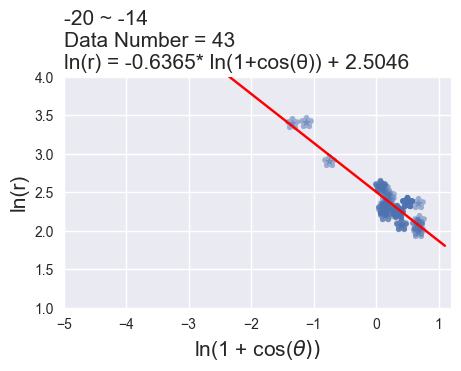

alpha =  0.6365135865165045
r0 =  7.872417900427234


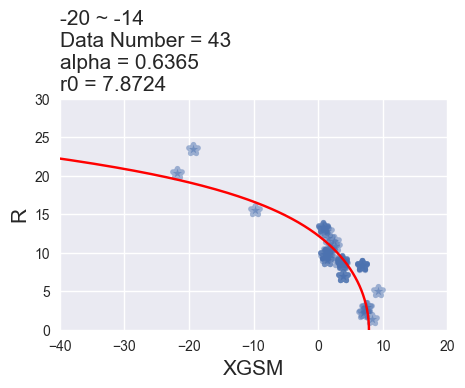

bz = -19 ~ -13
Coefficients: 
 [[-0.62405114]]
Intercept: 
 [2.49336833]


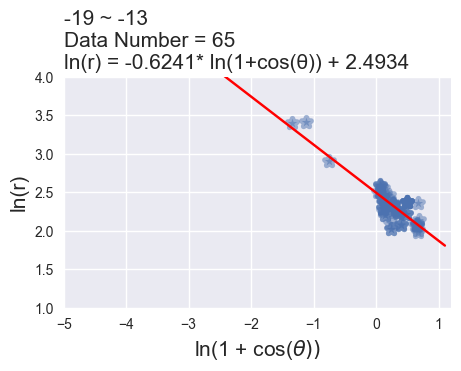

alpha =  0.6240511432782364
r0 =  7.852320078059885


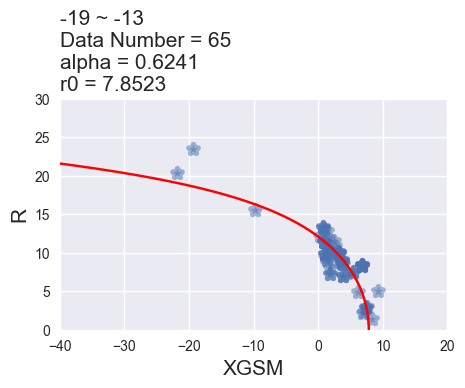

bz = -18 ~ -12
Coefficients: 
 [[-0.54600011]]
Intercept: 
 [2.4951248]


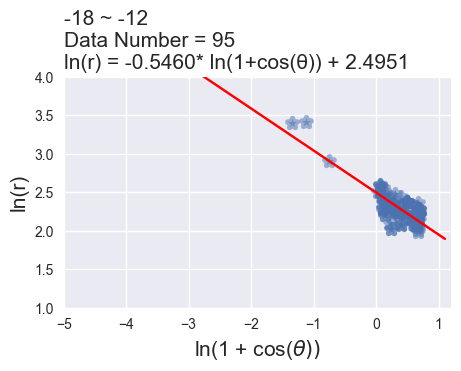

alpha =  0.5460001144930778
r0 =  8.30341071222528


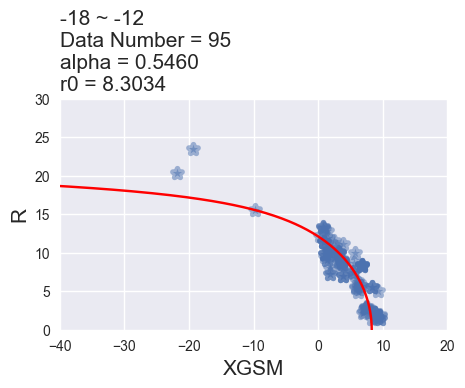

bz = -17 ~ -11
Coefficients: 
 [[-0.53060423]]
Intercept: 
 [2.50406862]


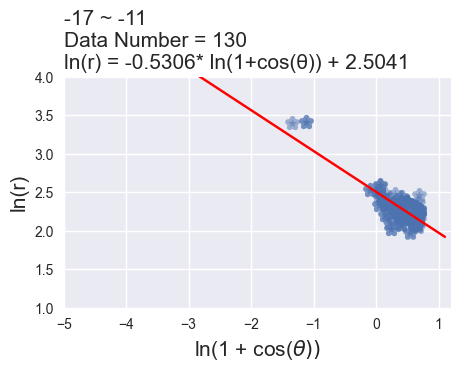

alpha =  0.5306042314075877
r0 =  8.467893601207486


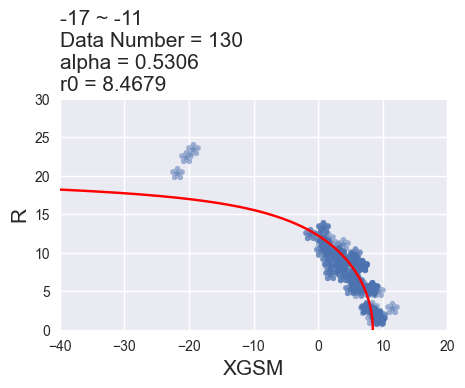

bz = -16 ~ -10
Coefficients: 
 [[-0.56326323]]
Intercept: 
 [2.52587814]


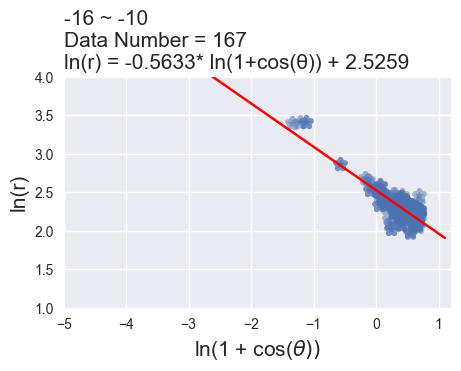

alpha =  0.5632632338526968
r0 =  8.460885309353195


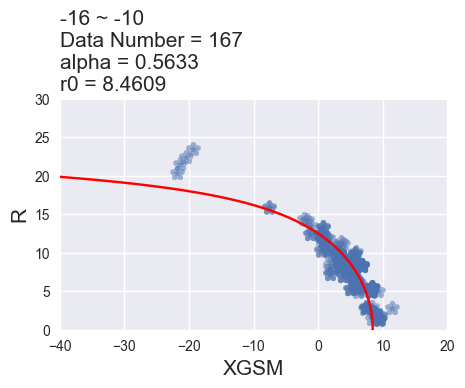

bz = -15 ~ -9
Coefficients: 
 [[-0.54159763]]
Intercept: 
 [2.52809129]


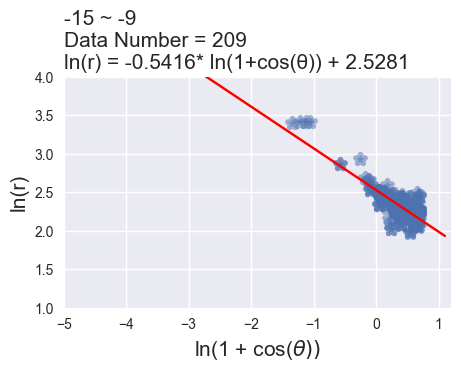

alpha =  0.5415976322922064
r0 =  8.607934721135205


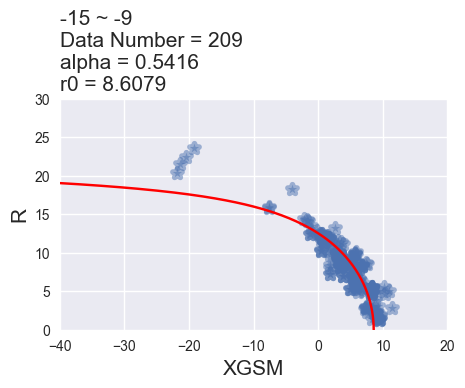

bz = -14 ~ -8
Coefficients: 
 [[-0.46845131]]
Intercept: 
 [2.51902327]


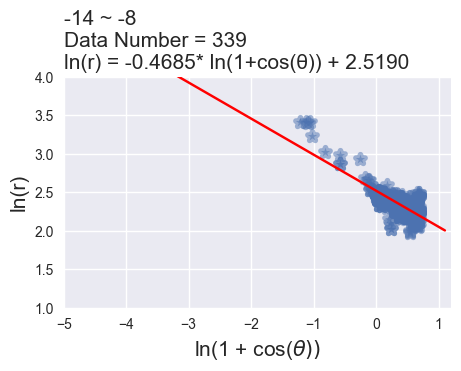

alpha =  0.46845131229469317
r0 =  8.973874831533166


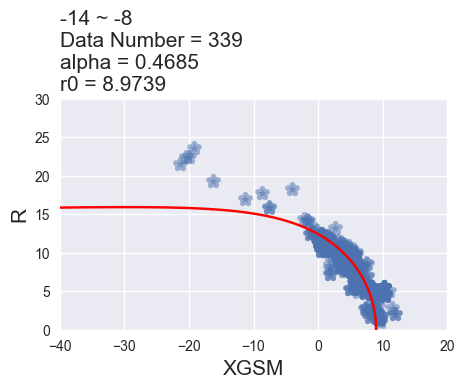

bz = -13 ~ -7
Coefficients: 
 [[-0.47673812]]
Intercept: 
 [2.53147046]


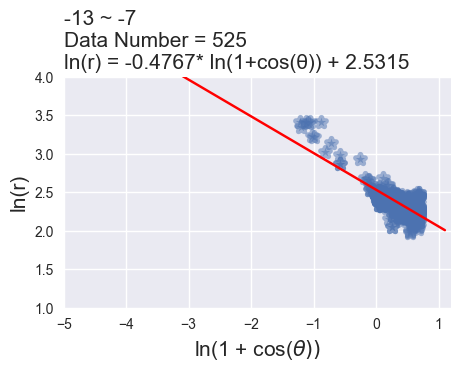

alpha =  0.476738116986206
r0 =  9.034230714726176


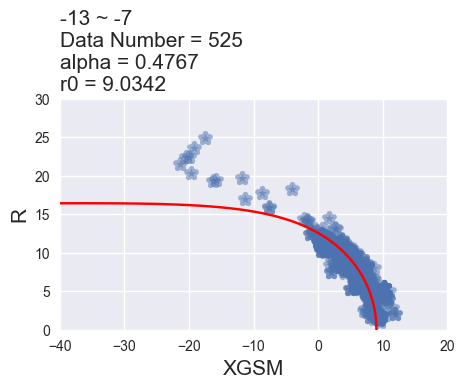

bz = -12 ~ -6
Coefficients: 
 [[-0.49714944]]
Intercept: 
 [2.55698683]


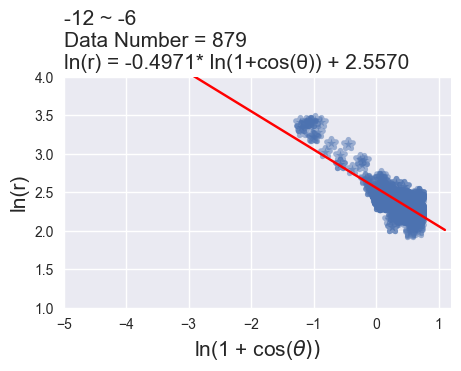

alpha =  0.4971494376210975
r0 =  9.13752081989029


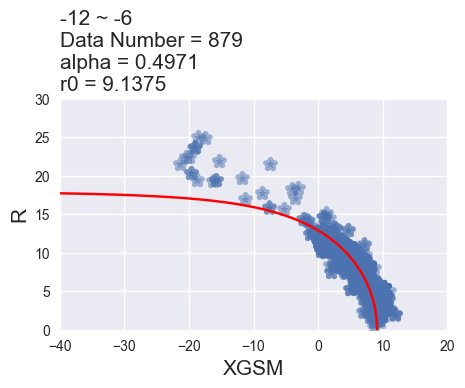

bz = -11 ~ -5
Coefficients: 
 [[-0.47102959]]
Intercept: 
 [2.5735866]


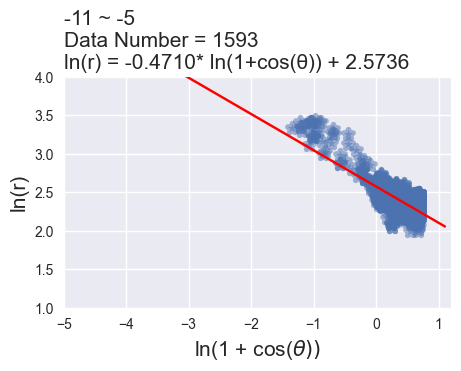

alpha =  0.471029594630187
r0 =  9.460202240225668


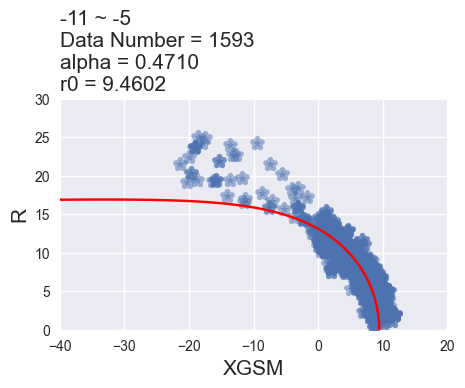

bz = -10 ~ -4
Coefficients: 
 [[-0.46805724]]
Intercept: 
 [2.59448527]


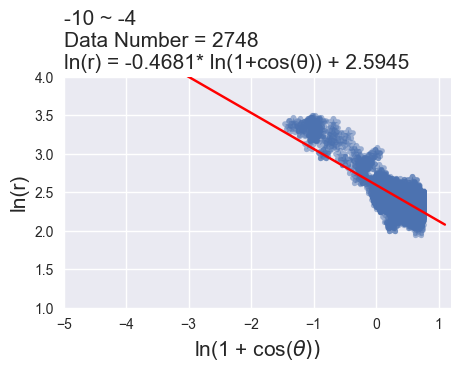

alpha =  0.46805724178588387
r0 =  9.67991108802199


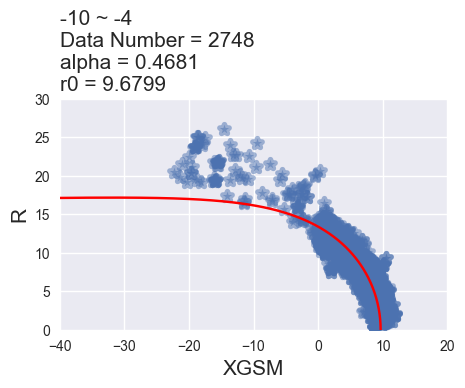

bz = -9 ~ -3
Coefficients: 
 [[-0.45864713]]
Intercept: 
 [2.61587307]


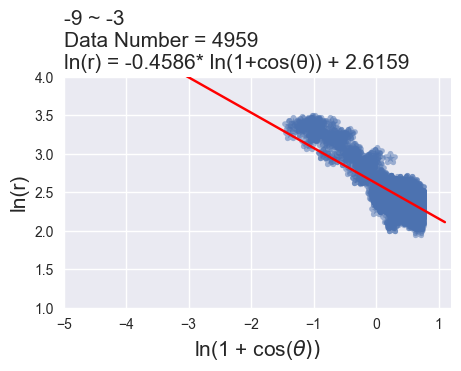

alpha =  0.45864713161160064
r0 =  9.953886717270523


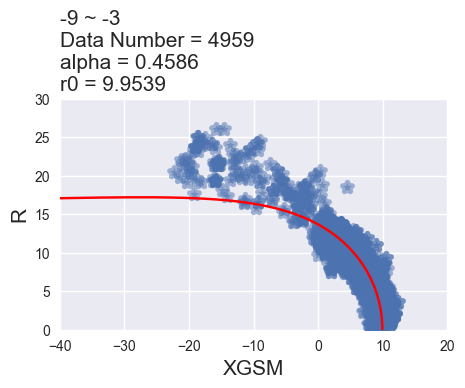

bz = -8 ~ -2
Coefficients: 
 [[-0.46885424]]
Intercept: 
 [2.64779309]


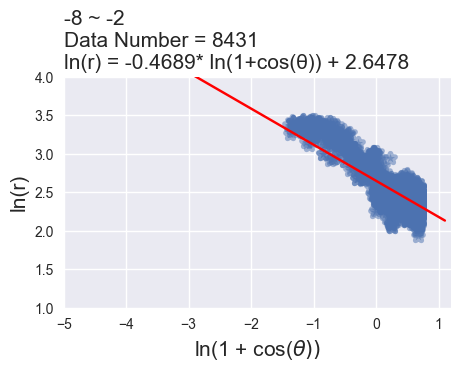

alpha =  0.46885423671492504
r0 =  10.204288711420059


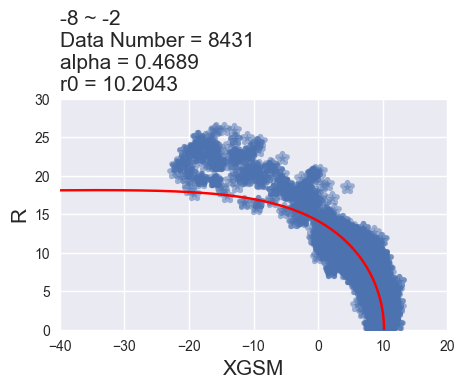

bz = -7 ~ -1
Coefficients: 
 [[-0.46243777]]
Intercept: 
 [2.66555999]


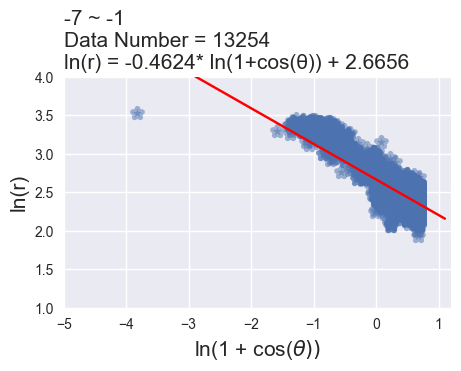

alpha =  0.46243776858092855
r0 =  10.433508094465239


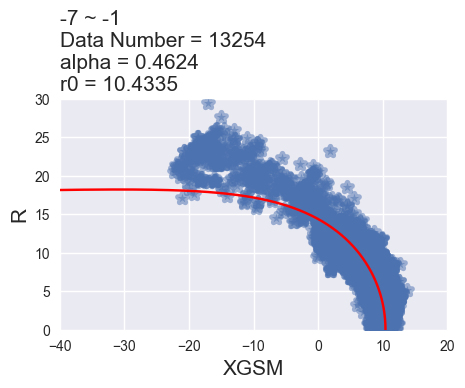

bz = -6 ~ 0
Coefficients: 
 [[-0.47228879]]
Intercept: 
 [2.68909178]


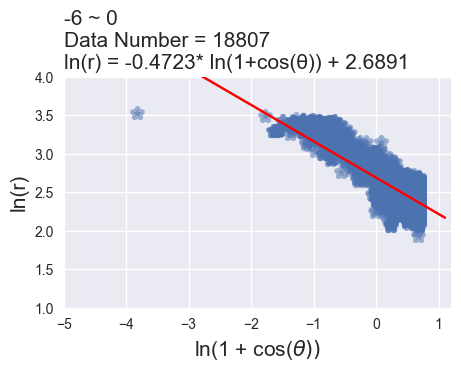

alpha =  0.4722887909865472
r0 =  10.609248673909132


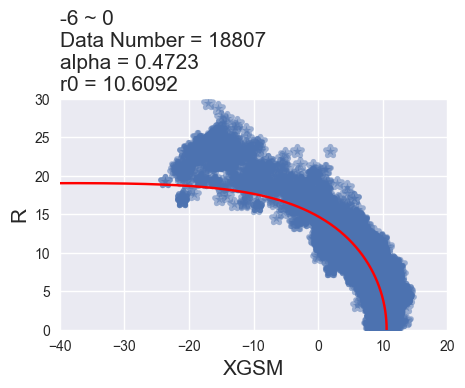

bz = -5 ~ 1
Coefficients: 
 [[-0.4768461]]
Intercept: 
 [2.70407997]


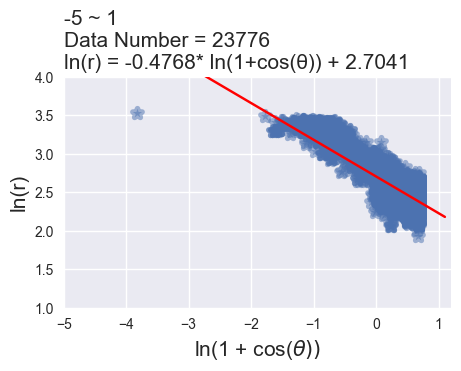

alpha =  0.4768460996483771
r0 =  10.735493892748131


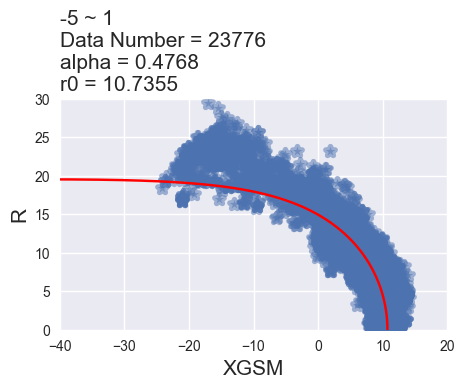

bz = -4 ~ 2
Coefficients: 
 [[-0.4867765]]
Intercept: 
 [2.71444194]


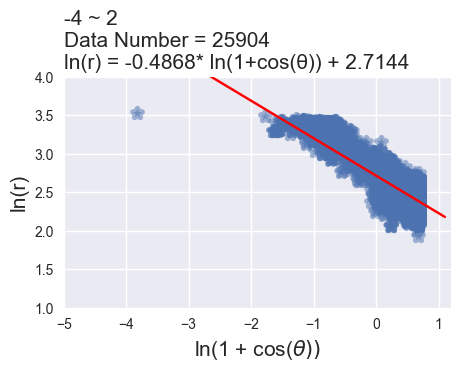

alpha =  0.48677649877023027
r0 =  10.772904981068407


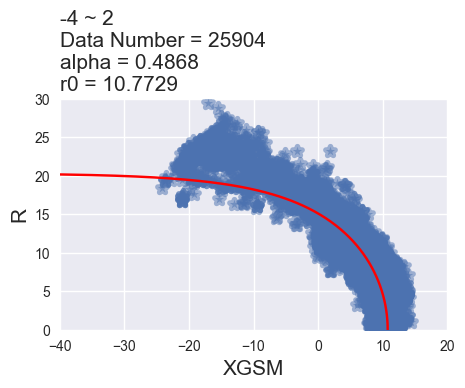

bz = -3 ~ 3
Coefficients: 
 [[-0.49045811]]
Intercept: 
 [2.71963263]


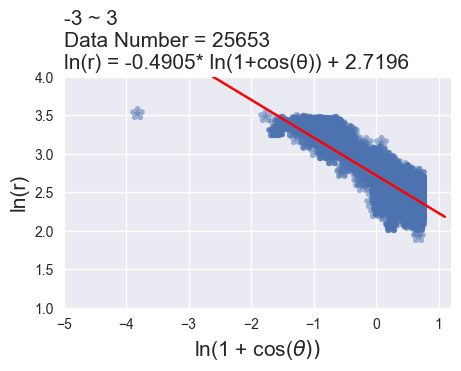

alpha =  0.4904581066297964
r0 =  10.801369976052747


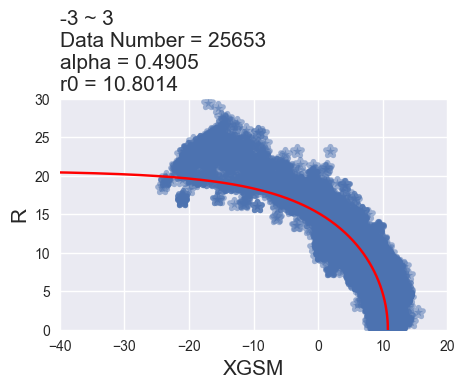

bz = -2 ~ 4
Coefficients: 
 [[-0.48864436]]
Intercept: 
 [2.72120925]


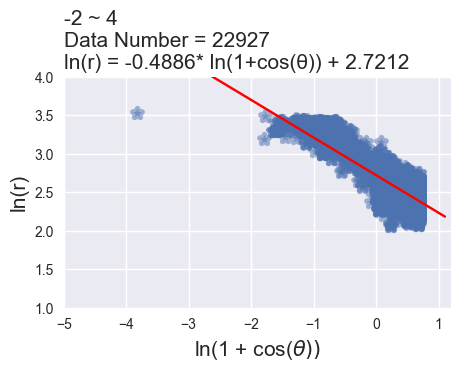

alpha =  0.48864435531446415
r0 =  10.832022525662628


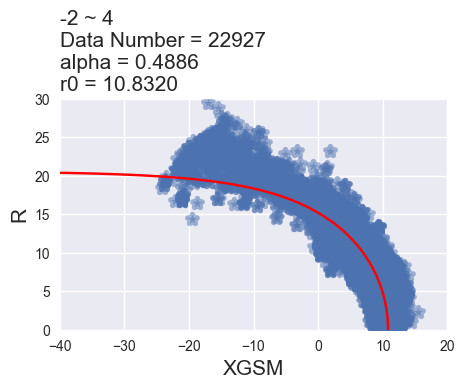

bz = -1 ~ 5
Coefficients: 
 [[-0.49499312]]
Intercept: 
 [2.72670075]


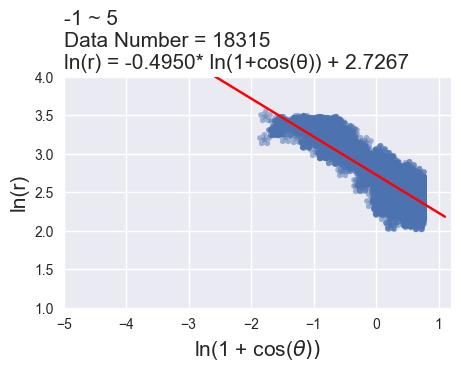

alpha =  0.4949931249153894
r0 =  10.843845247668572


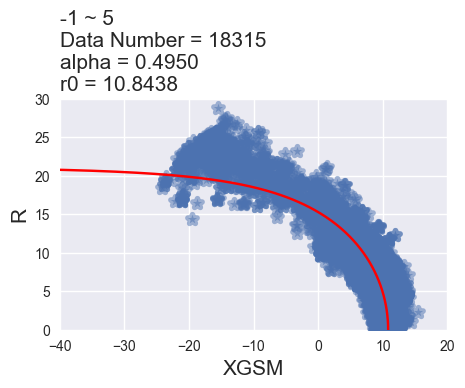

bz = 0 ~ 6
Coefficients: 
 [[-0.49398181]]
Intercept: 
 [2.72110799]


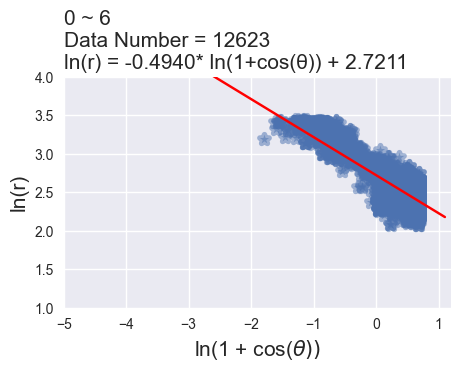

alpha =  0.4939818117281546
r0 =  10.79092916654412


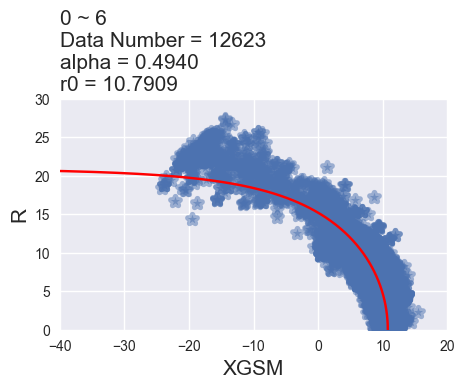

bz = 1 ~ 7
Coefficients: 
 [[-0.49983603]]
Intercept: 
 [2.70606062]


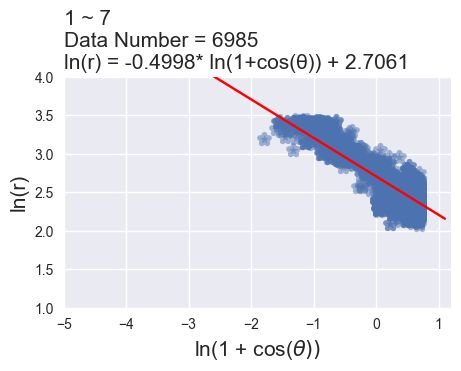

alpha =  0.4998360280774754
r0 =  10.586723234176825


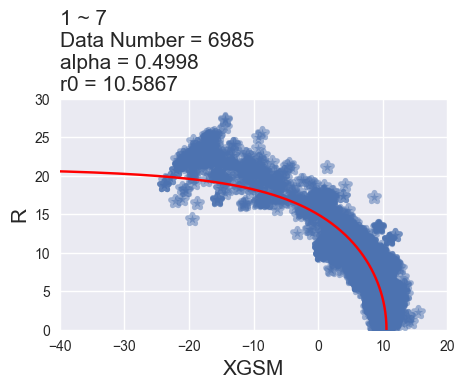

bz = 2 ~ 8
Coefficients: 
 [[-0.50391973]]
Intercept: 
 [2.68626182]


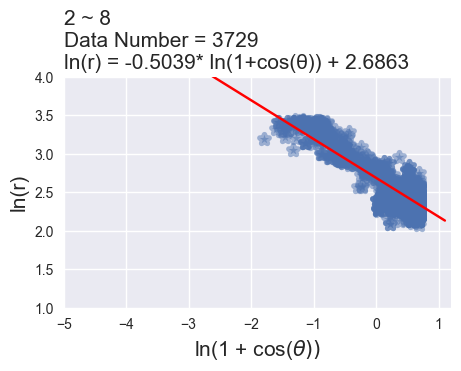

alpha =  0.5039197297386272
r0 =  10.349842304445938


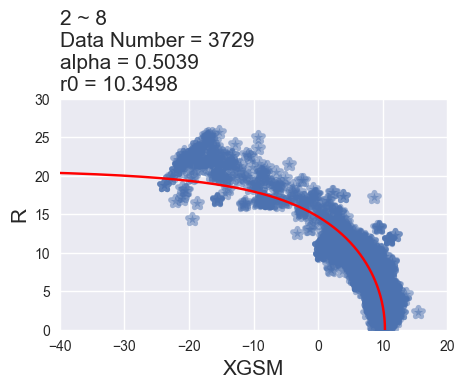

bz = 3 ~ 9
Coefficients: 
 [[-0.52042692]]
Intercept: 
 [2.6731641]


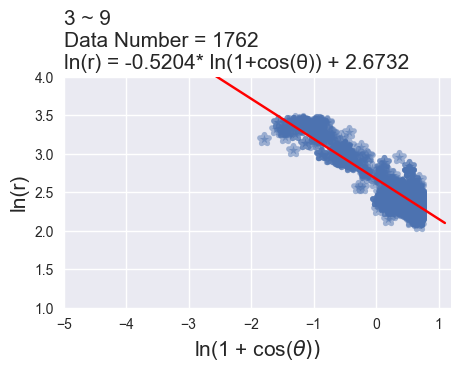

alpha =  0.5204269152672403
r0 =  10.098951993466136


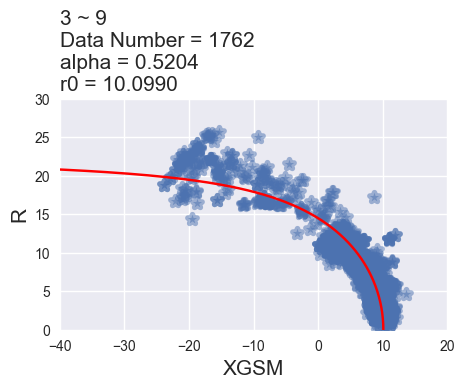

bz = 4 ~ 10
Coefficients: 
 [[-0.53911539]]
Intercept: 
 [2.66872731]


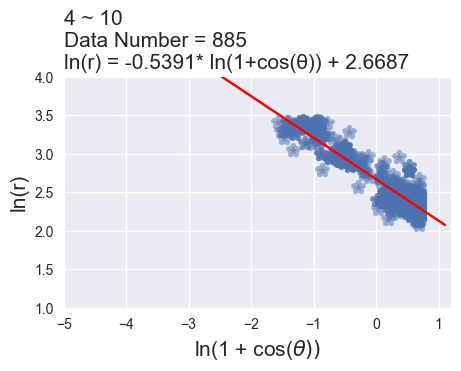

alpha =  0.5391153860299006
r0 =  9.924842956008705


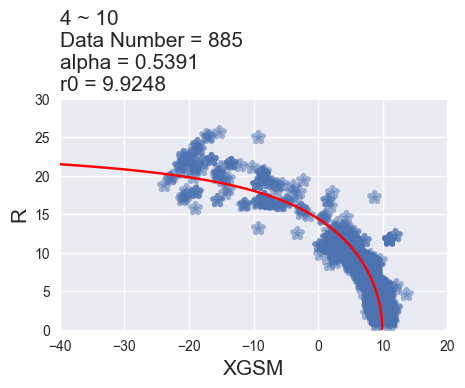

bz = 5 ~ 11
Coefficients: 
 [[-0.54198383]]
Intercept: 
 [2.65432886]


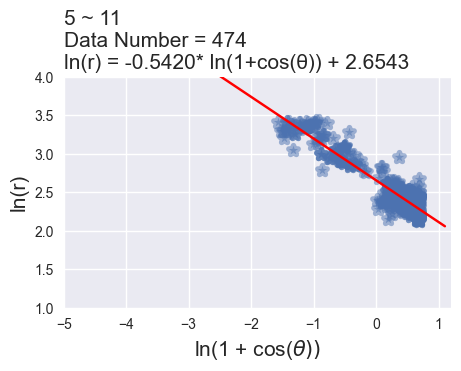

alpha =  0.541983825928186
r0 =  9.763532808549162


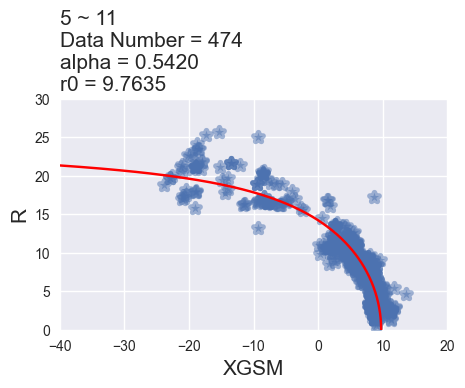

bz = 6 ~ 12
Coefficients: 
 [[-0.53858489]]
Intercept: 
 [2.62713397]


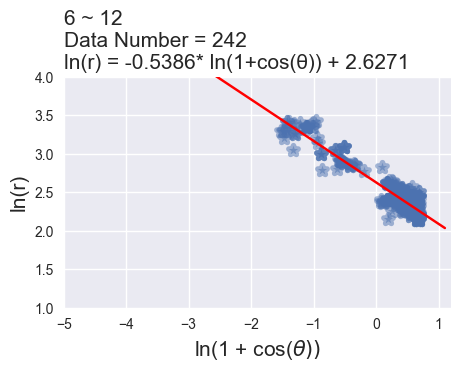

alpha =  0.5385848859759891
r0 =  9.524004259502531


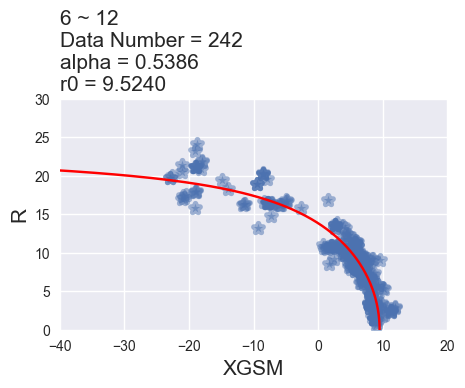

bz = 7 ~ 13
Coefficients: 
 [[-0.54427122]]
Intercept: 
 [2.61872909]


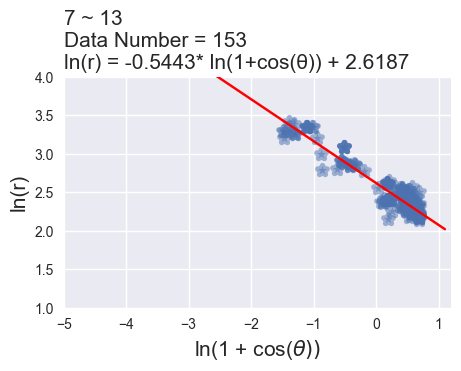

alpha =  0.5442712172687665
r0 =  9.407140558123421


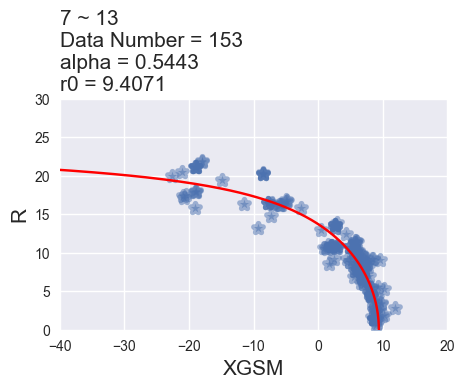

bz = 8 ~ 14
Coefficients: 
 [[-0.5337584]]
Intercept: 
 [2.60920082]


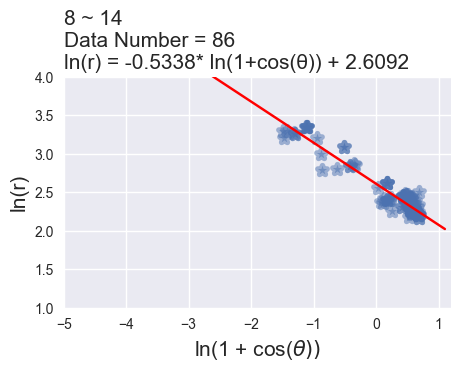

alpha =  0.533758401897877
r0 =  9.386079514272751


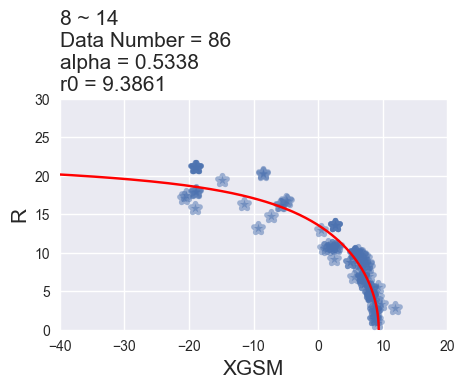

bz = 9 ~ 15
Coefficients: 
 [[-0.54530477]]
Intercept: 
 [2.62377493]


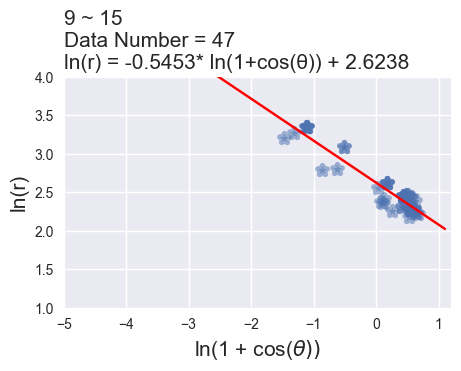

alpha =  0.5453047713078603
r0 =  9.447956438253406


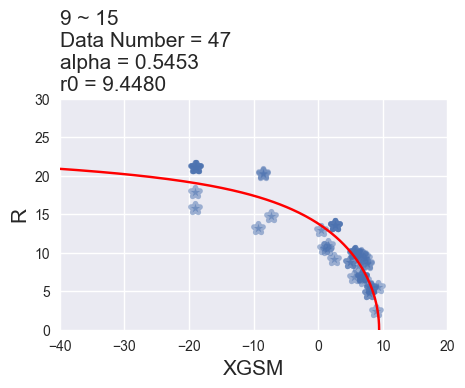

bz = 10 ~ 16
Coefficients: 
 [[-0.58253701]]
Intercept: 
 [2.63102701]


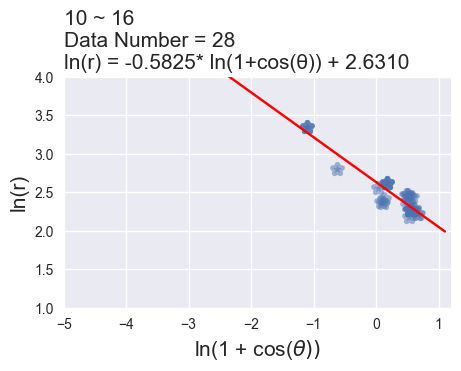

alpha =  0.5825370100623192
r0 =  9.27426285308287


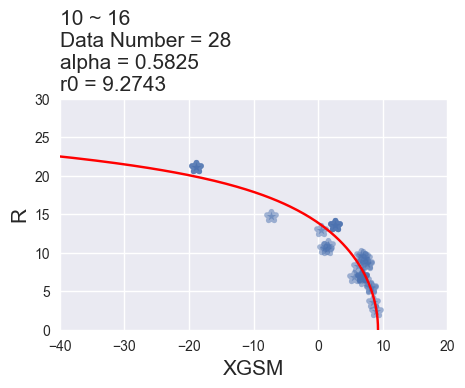

bz = 11 ~ 17
Coefficients: 
 [[-0.47301314]]
Intercept: 
 [2.51319418]


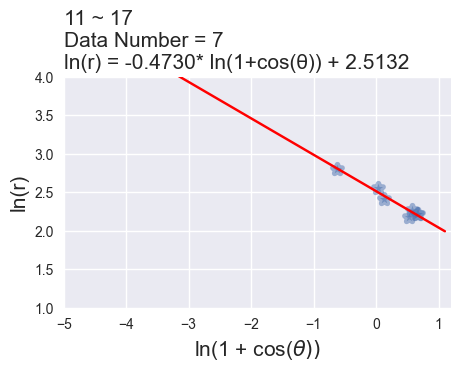

alpha =  0.47301313571979375
r0 =  8.893551495454565


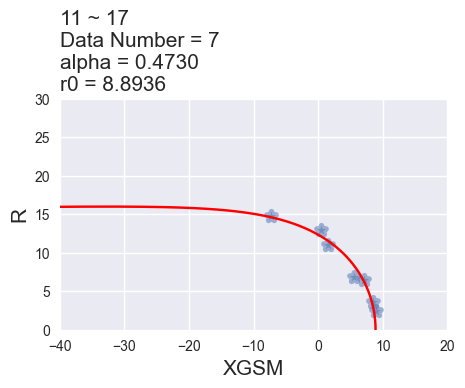

In [54]:
# save the alpha and r0 in a list
alpha_list_b = []
r0_list_b = []

for i in range(0, 32):
    test_frag = data[(data['Bz'] > -20 + i) & (data['Bz'] < -14 + i)]
    # test_frag = pd.concat([test_frag, n_data])
    print(f'bz = {-20 + i} ~ {-14 + i}')
    alpha, r0 = plot(test_frag, f'{-20 + i} ~ {-14 + i}')
    alpha_list_b.append(alpha)
    r0_list_b.append(r0)

In [55]:
len(alpha_list_b)

32

In [56]:
np.arange(-18, 14, 1).shape

(32,)

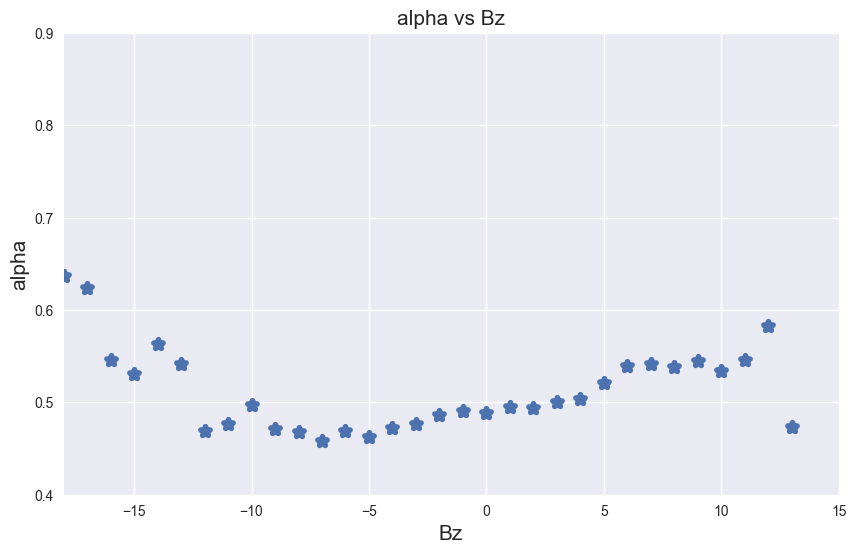

In [57]:
# plot scatter the alpha and bz_center
Bz_range = np.arange(-18, 14, 1)

plt.figure(figsize = (10, 6))
plt.scatter(Bz_range, alpha_list_b, marker = '*', linewidths = 4)
plt.title('alpha vs Bz', fontsize = 15)
plt.xlabel('Bz', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.xlim(-18, 15)
plt.ylim(0.4, 0.9)
plt.show()

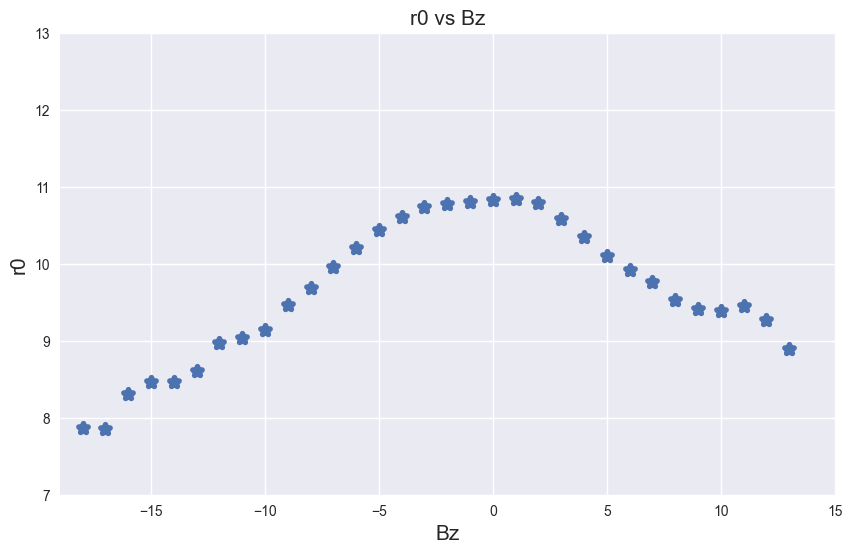

In [58]:
# plot scatter the r0 and bz_center
plt.figure(figsize = (10, 6))
plt.scatter(Bz_range, r0_list_b, marker = '*', linewidths = 4)
plt.title('r0 vs Bz', fontsize = 15)
plt.xlabel('Bz', fontsize = 15)
plt.ylabel('r0', fontsize = 15)
plt.xlim(-19, 15)
plt.ylim(7, 13)
plt.show()

Coefficients: 
 [[-0.52054946]]
Intercept: 
 [2.75241645]


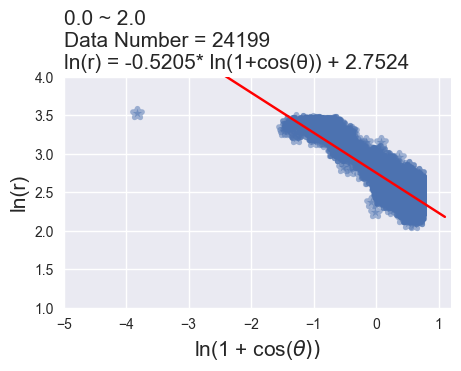

alpha =  0.5205494642704745
r0 =  10.93095919021286


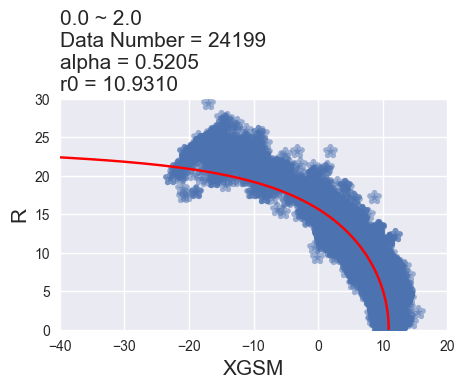

Coefficients: 
 [[-0.5102152]]
Intercept: 
 [2.73357124]


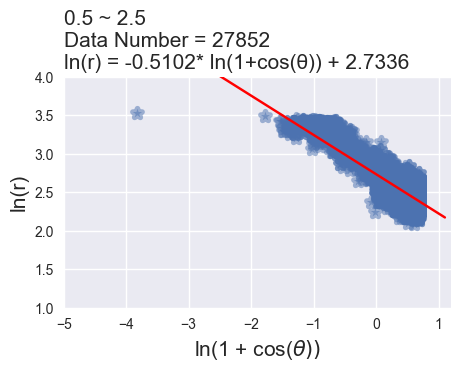

alpha =  0.5102151965663932
r0 =  10.804006296566994


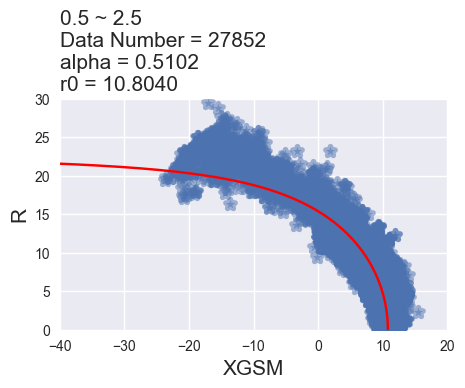

Coefficients: 
 [[-0.49860063]]
Intercept: 
 [2.70083039]


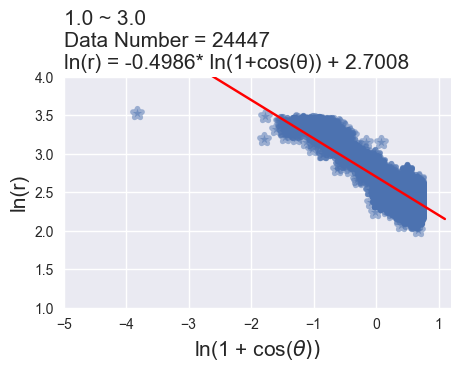

alpha =  0.4986006298462143
r0 =  10.540518882889883


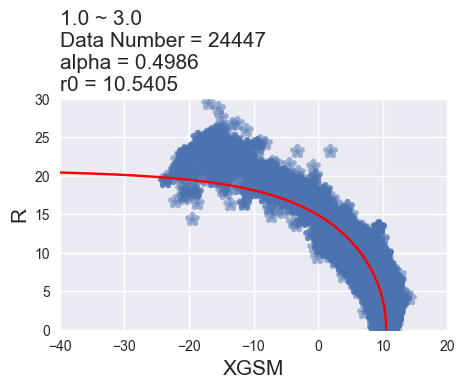

Coefficients: 
 [[-0.50871485]]
Intercept: 
 [2.66316884]


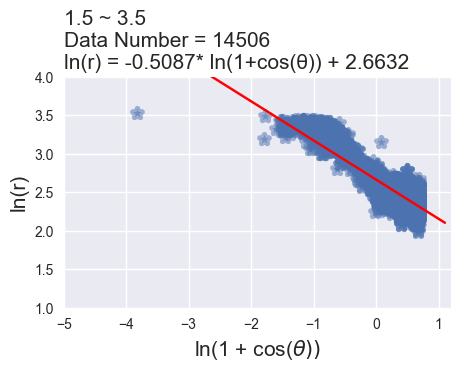

alpha =  0.5087148455118011
r0 =  10.08001328711365


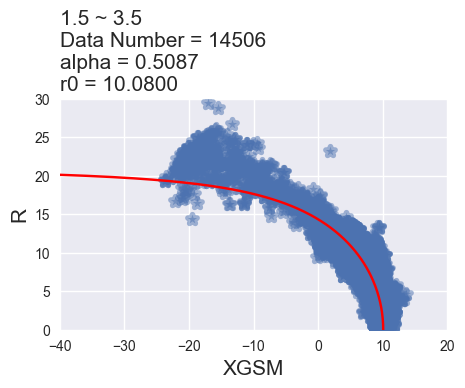

Coefficients: 
 [[-0.52764231]]
Intercept: 
 [2.63004225]


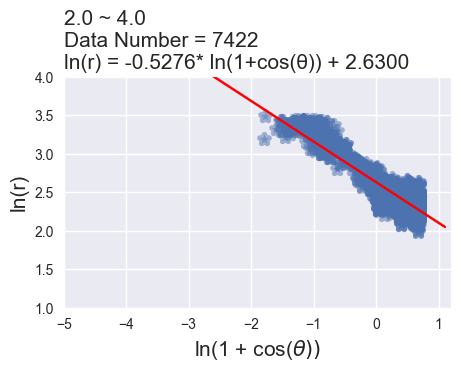

alpha =  0.527642308081975
r0 =  9.624466699884309


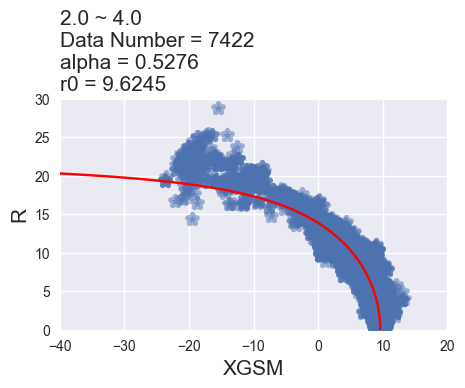

Coefficients: 
 [[-0.54845861]]
Intercept: 
 [2.60097465]


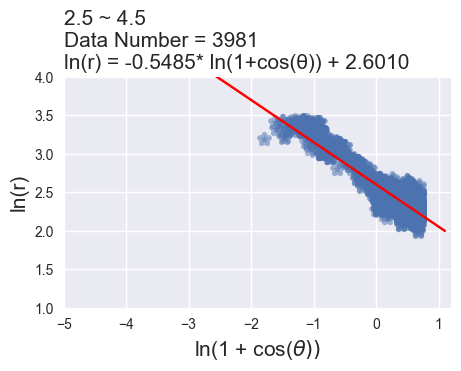

alpha =  0.5484586095775245
r0 =  9.214811295048785


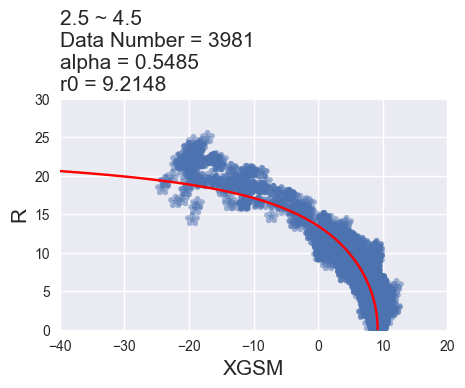

Coefficients: 
 [[-0.5782058]]
Intercept: 
 [2.58173177]


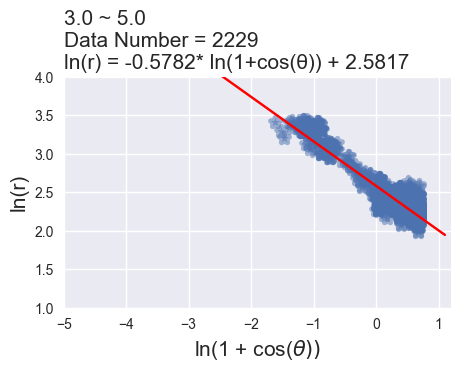

alpha =  0.5782057968936737
r0 =  8.85471467475744


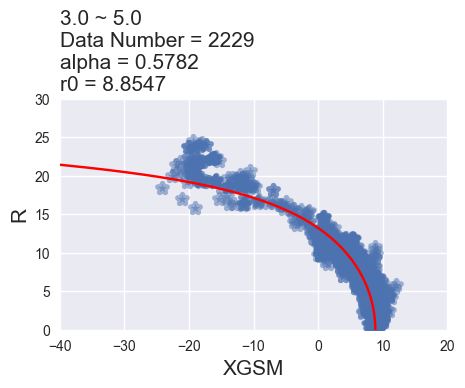

Coefficients: 
 [[-0.58102879]]
Intercept: 
 [2.5636119]


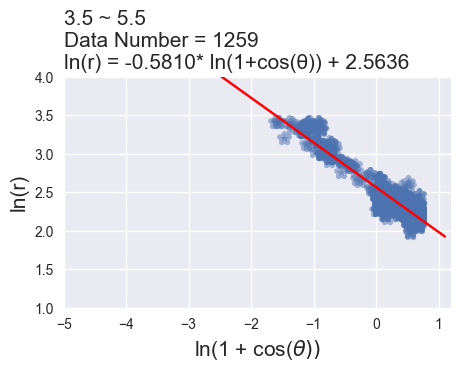

alpha =  0.5810287868408014
r0 =  8.678714619933846


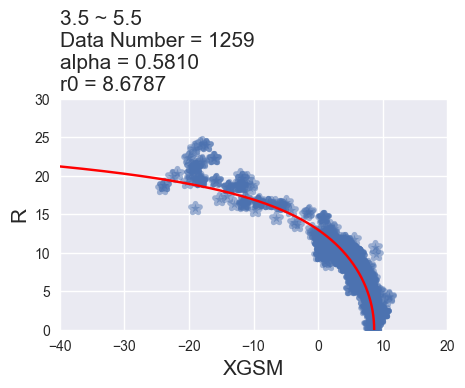

Coefficients: 
 [[-0.57297197]]
Intercept: 
 [2.54665629]


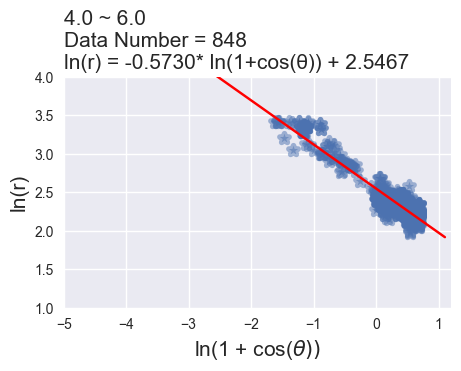

alpha =  0.5729719668563489
r0 =  8.580587495183842


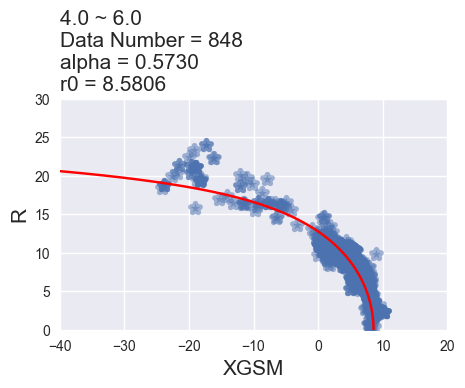

Coefficients: 
 [[-0.57637391]]
Intercept: 
 [2.52696975]


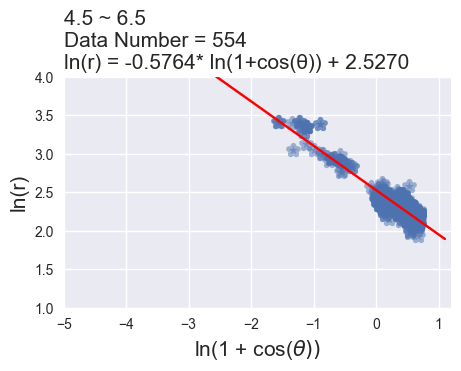

alpha =  0.5763739061390062
r0 =  8.393501697633559


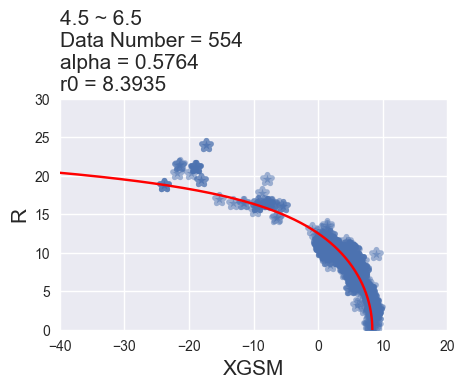

Coefficients: 
 [[-0.56141217]]
Intercept: 
 [2.51445363]


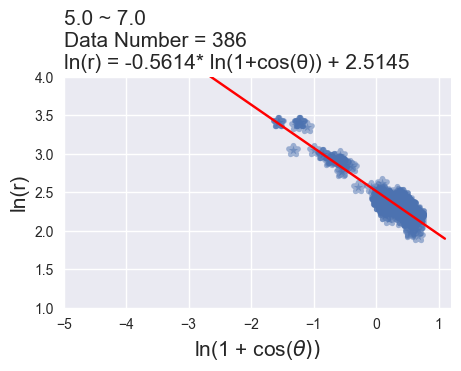

alpha =  0.5614121663399032
r0 =  8.375513327299739


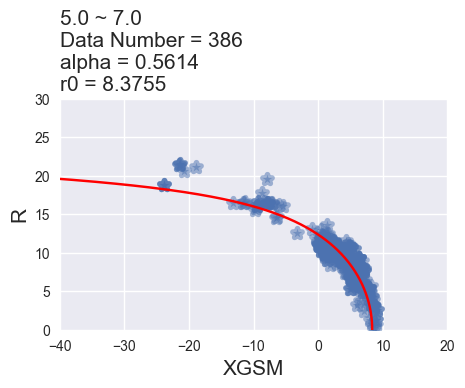

Coefficients: 
 [[-0.56392917]]
Intercept: 
 [2.50220963]


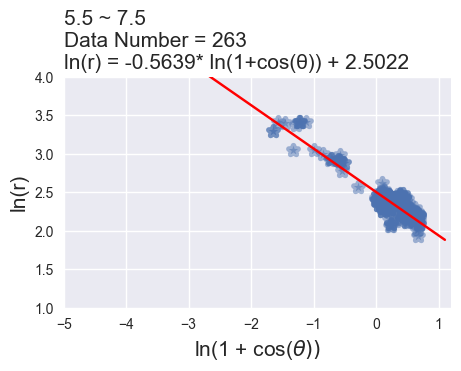

alpha =  0.5639291684798288
r0 =  8.259166861887167


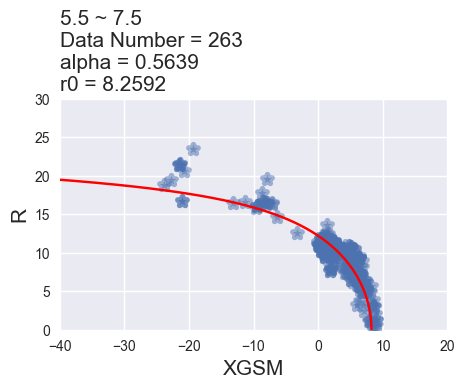

Coefficients: 
 [[-0.58996249]]
Intercept: 
 [2.48801928]


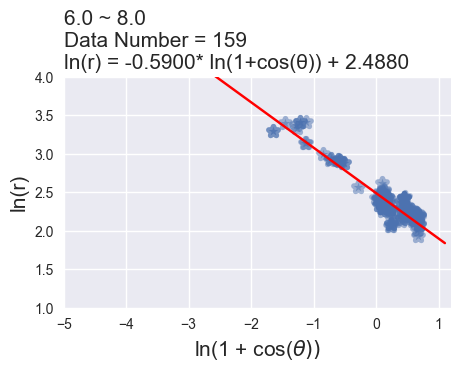

alpha =  0.5899624921020229
r0 =  7.997175665353644


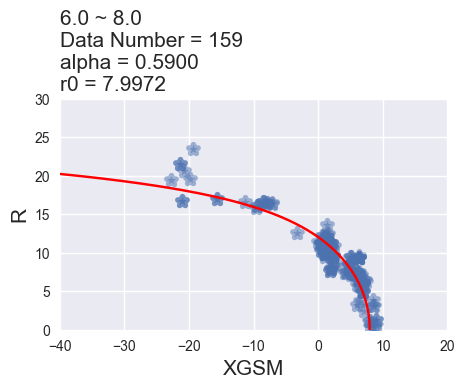

Coefficients: 
 [[-0.57036158]]
Intercept: 
 [2.47093455]


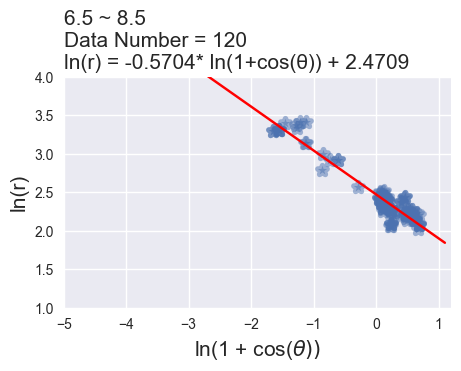

alpha =  0.5703615779080001
r0 =  7.9692471536032015


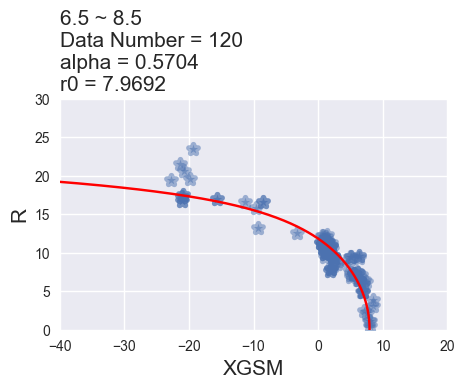

Coefficients: 
 [[-0.58747181]]
Intercept: 
 [2.44953429]


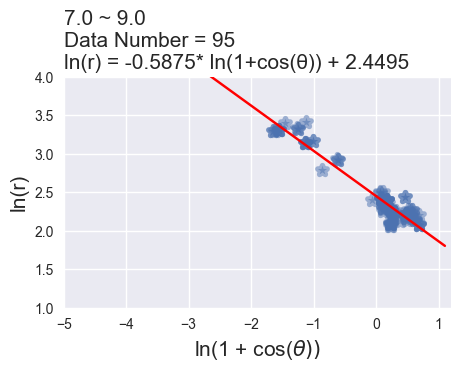

alpha =  0.5874718104968493
r0 =  7.708548135992652


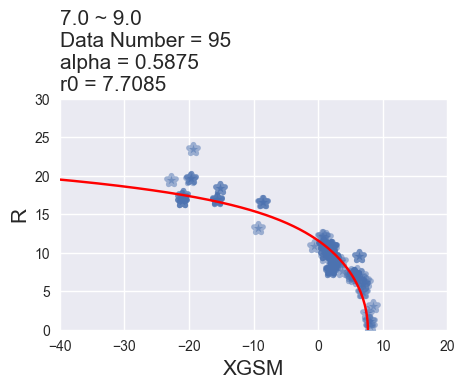

Coefficients: 
 [[-0.59503318]]
Intercept: 
 [2.43308083]


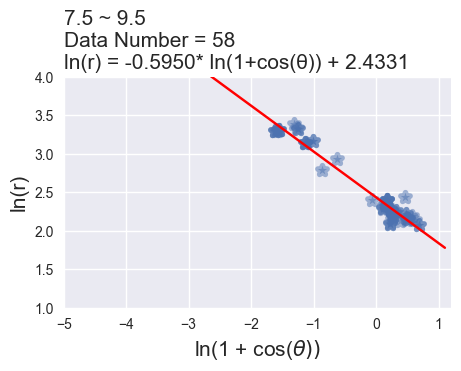

alpha =  0.5950331759765802
r0 =  7.5431152425193995


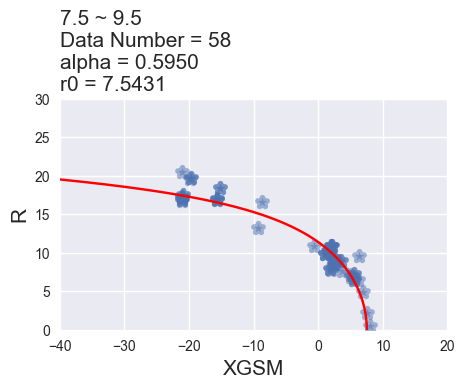

In [59]:
alpha_list_p = []
r0_list_p = []

for i in range(0, 16):
    test_frag = data[(data['Dp'] > i*0.5) & (data['Dp'] < i*0.5 + 2)]
    # test_frag = pd.concat([test_frag, n_data])
    alpha, r0 = plot(test_frag, f'{i*0.5} ~ {i*0.5 + 2}')
    alpha_list_p.append(alpha)
    r0_list_p.append(r0)

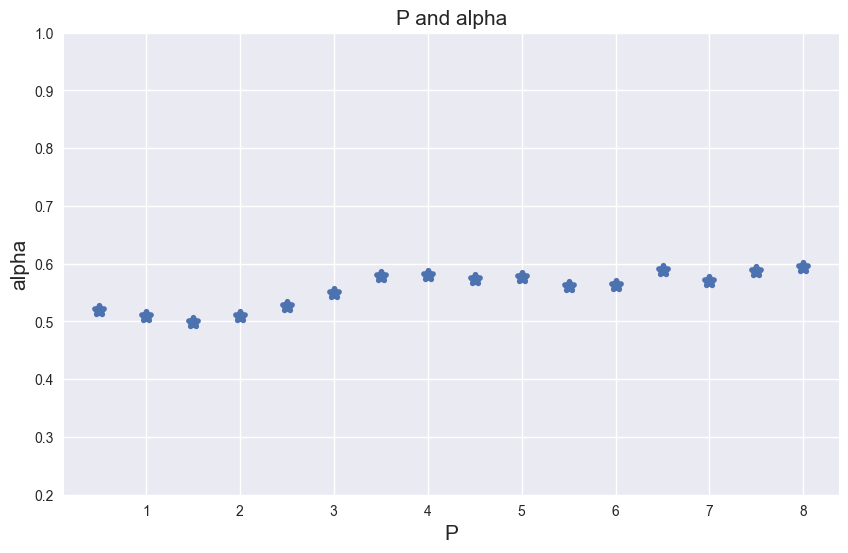

In [60]:
P_center = np.arange(0.5, 8.5, 0.5)
# plot the P and alpha
plt.figure(figsize = (10, 6))
plt.scatter(P_center, alpha_list_p, marker = '*', linewidths = 4)
plt.title('P and alpha', fontsize = 15)
plt.xlabel('P', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.ylim(0.2, 1.0)
plt.show()

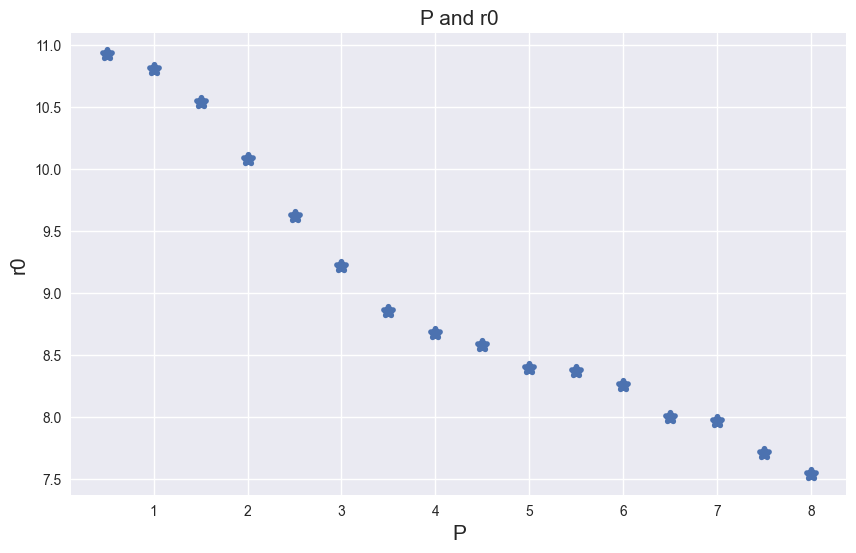

In [61]:
# plot the P and r0
plt.figure(figsize = (10, 6))
plt.scatter(P_center, r0_list_p, marker = '*', linewidths = 4)
plt.title('P and r0', fontsize = 15)
plt.xlabel('P', fontsize = 15)
plt.ylabel('r0', fontsize = 15)
plt.show()

In [62]:
b_df = pd.DataFrame({'Bz': Bz_range, 'alpha': alpha_list_b, 'r0': r0_list_b})
b_df.to_csv('b_df.csv', index = False)

In [63]:
p_df = pd.DataFrame({'Dp': P_center, 'alpha': alpha_list_p, 'r0': r0_list_p})
p_df.to_csv('p_df.csv', index = False)

In [64]:
data['Bz'].mean()

-0.7338975205937526

In [65]:
data['Dp'].mean()

1.7335727299047798

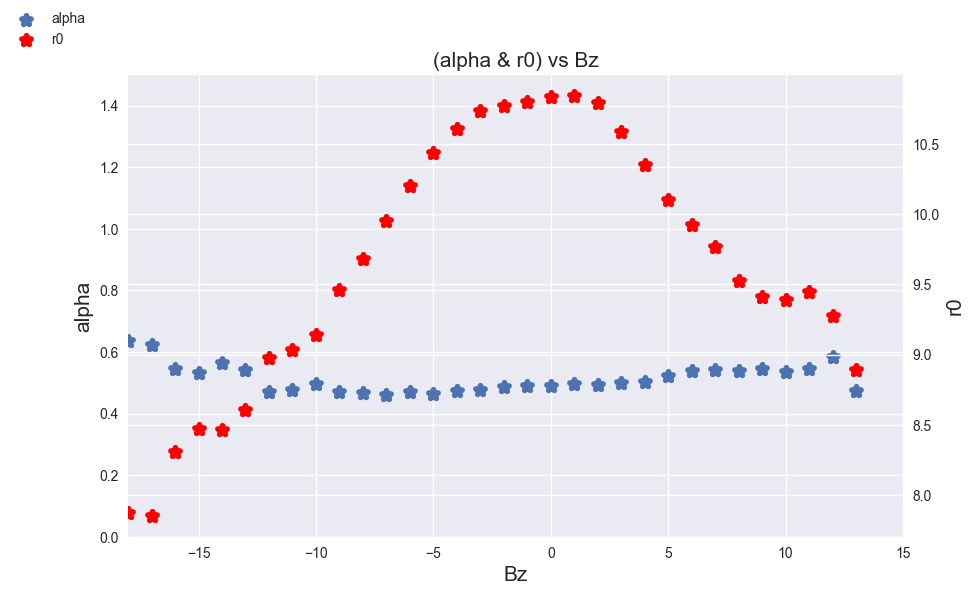

In [66]:
# 將上面兩張圖合併
fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.scatter(b_df['Bz'], b_df['alpha'], marker = '*', linewidths = 4)
ax1.set_xlabel('Bz', fontsize = 15)
ax1.set_ylabel('alpha', fontsize = 15)
ax1.set_xlim(-18, 15)
ax1.set_ylim(0, 1.5)
ax2 = ax1.twinx()
ax2.scatter(b_df['Bz'], b_df['r0'], marker = '*', linewidths = 4, color = 'r')
ax2.set_ylabel('r0', fontsize = 15)
plt.title('(alpha & r0) vs Bz', fontsize = 15)
fig.legend(['alpha', 'r0'], loc = 'upper left')
plt.show()

KeyError: 'P'

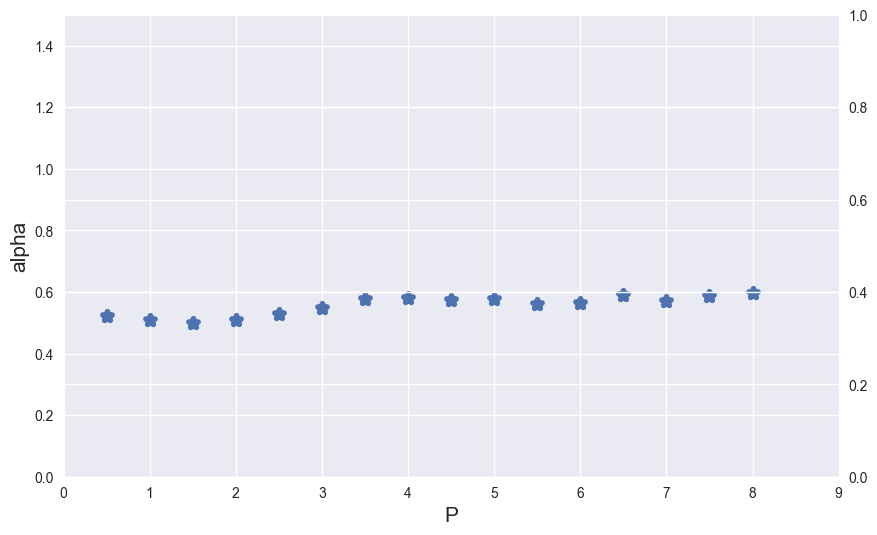

In [68]:
# 將上面兩張圖合併
fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.scatter(p_df['Dp'], p_df['alpha'], marker = '*', linewidths = 4)
ax1.set_xlabel('P', fontsize = 15)
ax1.set_ylabel('alpha', fontsize = 15)
ax1.set_xlim(0, 9)
ax1.set_ylim(0, 1.5)
ax2 = ax1.twinx()
ax2.scatter(p_df['P'], p_df['r0'], marker = '*', linewidths = 4, color = 'r')
ax2.set_ylabel('r0', fontsize = 15)
plt.title('(alpha & r0) vs P', fontsize = 15)
fig.legend(['alpha', 'r0'], loc = 'upper left')
plt.show()

In [69]:
# fit the p and r0 with power law
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a * x ** b

popt, pcov = curve_fit(power_law, p_df['Dp'], p_df['r0'])
popt

array([10.58545551, -0.13978701])

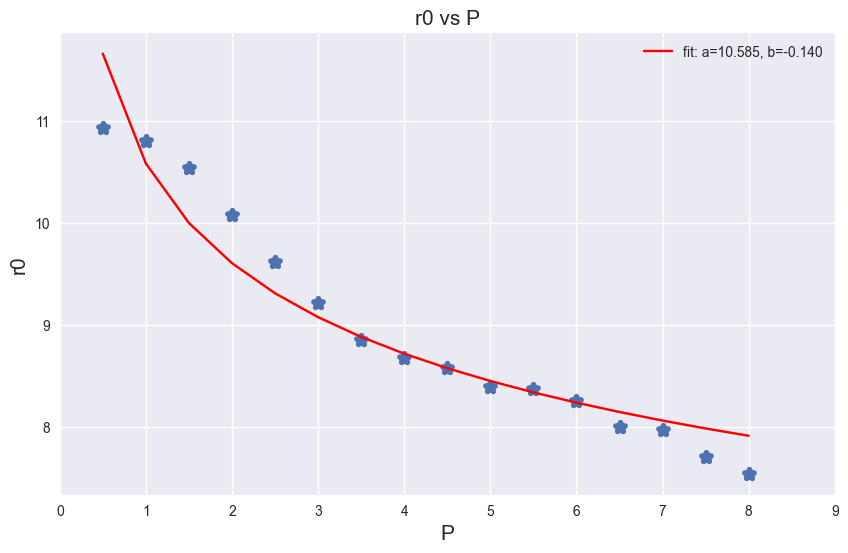

In [71]:
# plot the power law
plt.figure(figsize = (10, 6))
plt.scatter(p_df['Dp'], p_df['r0'], marker = '*', linewidths = 4)
plt.plot(p_df['Dp'], power_law(p_df['Dp'], *popt), 'r-', label = 'fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.title('r0 vs P', fontsize = 15)
plt.xlabel('P', fontsize = 15)
plt.ylabel('r0', fontsize = 15)
plt.xlim(0, 9)
plt.legend()
plt.show()

In [72]:
# fit the p and alpha with power law
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a * x ** b

popt, pcov = curve_fit(power_law, p_df['Dp'], p_df['alpha'], p0=[1, 5])
popt

array([0.51295429, 0.06439117])

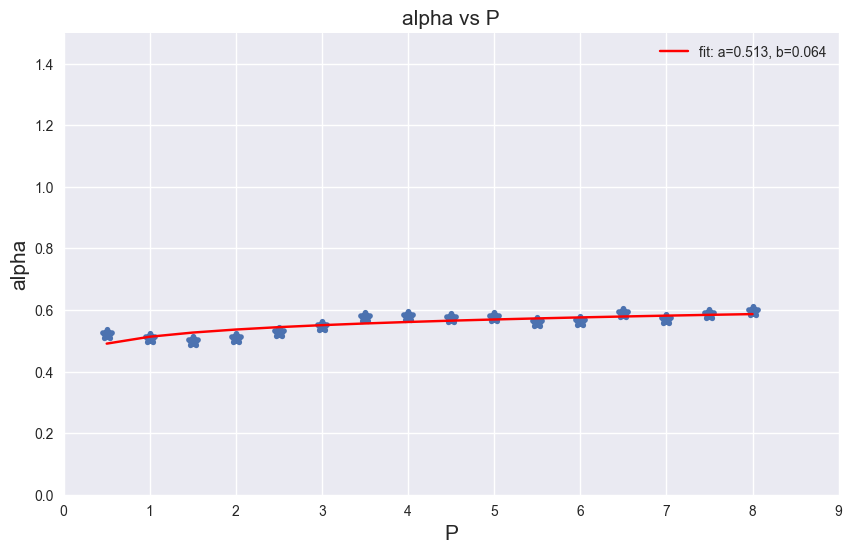

In [73]:
# plot the power law
plt.figure(figsize = (10, 6))
plt.scatter(p_df['Dp'], p_df['alpha'], marker = '*', linewidths = 4)
plt.plot(p_df['Dp'], power_law(p_df['Dp'], *popt), 'r-', label = 'fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.title('alpha vs P', fontsize = 15)
plt.xlabel('P', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.xlim(0, 9)
plt.ylim(0, 1.5)
plt.legend()
plt.show()

In [74]:
# combine the two tanh functions
def tanh(x, a, b, c, d, e, f, g):
    return a * np.tanh(b * (x - c)) + d * np.tanh(e * (x - f)) + g

popt, pcov = curve_fit(tanh, b_df['Bz'], b_df['r0'], p0=[1, 1, -9, -1, 1, 6.5, 10])
popt

array([ 3.50503902,  0.0825787 , -5.2285312 , -2.53082569,  0.14502677,
        3.92104964,  8.14027411])

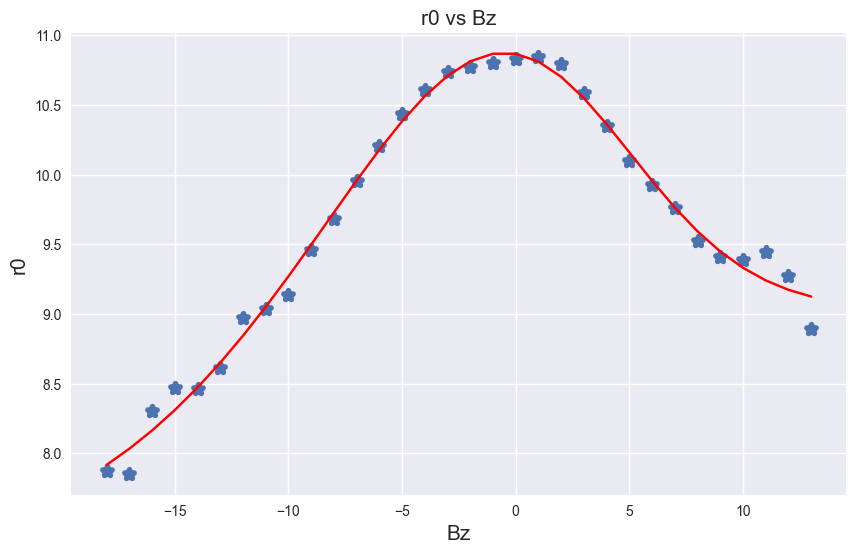

In [75]:
# plot the tanh function
plt.figure(figsize = (10, 6))
plt.scatter(b_df['Bz'], b_df['r0'], marker = '*', linewidths = 4)
plt.plot(b_df['Bz'], tanh(b_df['Bz'], *popt), 'r-')
plt.title('r0 vs Bz', fontsize = 15)
plt.xlabel('Bz', fontsize = 15)
plt.ylabel('r0', fontsize = 15)
plt.show()

In [76]:
# fit the bz and alpha with with ax + b
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, b_df['Bz'], b_df['alpha'], p0=[1, 0])
popt

array([-4.45773531e-04,  5.12639781e-01])

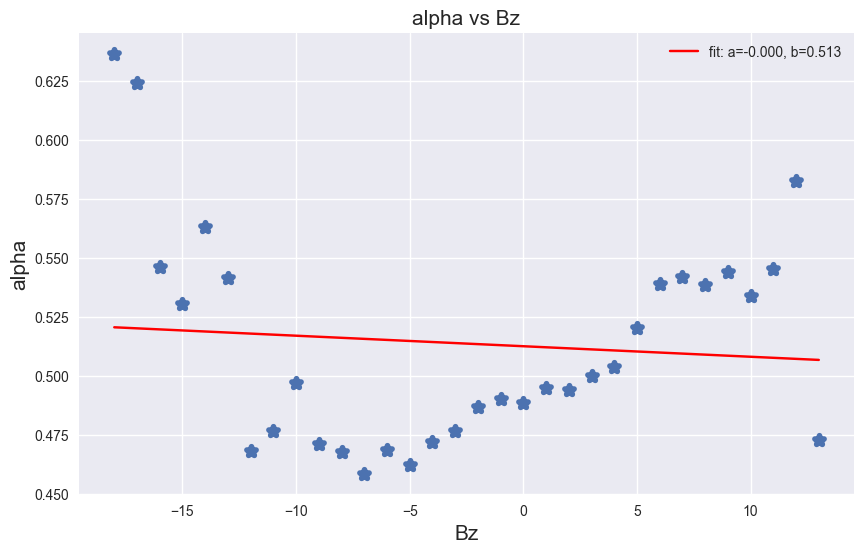

In [77]:
# plot the poly function
plt.figure(figsize = (10, 6))
plt.scatter(b_df['Bz'], b_df['alpha'], marker = '*', linewidths = 4)
plt.plot(b_df['Bz'], linear(b_df['Bz'], *popt), 'r-', label = 'fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.title('alpha vs Bz', fontsize = 15)
plt.xlabel('Bz', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.legend()
plt.show()

In [78]:
# add the average Bz in p_df, where average Bz is -0.54396
p_df['Bz'] = data['Bz'].mean()
b_df['Dp'] = data['Dp'].mean()

In [79]:
df = pd.concat([p_df, b_df], ignore_index = True)
df

Dp     alpha         r0         Bz
0   0.500000  0.520549  10.930959  -0.733898
1   1.000000  0.510215  10.804006  -0.733898
2   1.500000  0.498601  10.540519  -0.733898
3   2.000000  0.508715  10.080013  -0.733898
4   2.500000  0.527642   9.624467  -0.733898
5   3.000000  0.548459   9.214811  -0.733898
6   3.500000  0.578206   8.854715  -0.733898
7   4.000000  0.581029   8.678715  -0.733898
8   4.500000  0.572972   8.580587  -0.733898
9   5.000000  0.576374   8.393502  -0.733898
10  5.500000  0.561412   8.375513  -0.733898
11  6.000000  0.563929   8.259167  -0.733898
12  6.500000  0.589962   7.997176  -0.733898
13  7.000000  0.570362   7.969247  -0.733898
14  7.500000  0.587472   7.708548  -0.733898
15  8.000000  0.595033   7.543115  -0.733898
16  1.733573  0.636514   7.872418 -18.000000
17  1.733573  0.624051   7.852320 -17.000000
18  1.733573  0.546000   8.303411 -16.000000
19  1.733573  0.530604   8.467894 -15.000000
20  1.733573  0.563263   8.460885 -14.000000
21  1.733573  0.541598   8.607935 -13.000000
22  1.733573  0.468451   8.973875 -12.000000
23  1.733573  0.476738   9.034231 -11.000000
24  1.733573  0.497149   9.137521 -10.000000
25  1.733573  0.471030   9.460202  -9.000000
26  1.733573  0.468057   9.679911  -8.000000
27  1.733573  0.458647   9.953887  -7.000000
28  1.733573  0.468854  10.204289  -6.000000
29  1.733573  0.462438  10.433508  -5.000000
30  1.733573  0.472289  10.609249  -4.000000
31  1.733573  0.476846  10.735494  -3.000000
32  1.733573  0.486776  10.772905  -2.000000
33  1.733573  0.490458  10.801370  -1.000000
34  1.733573  0.488644  10.832023   0.000000
35  1.733573  0.494993  10.843845   1.000000
36  1.733573  0.493982  10.790929   2.000000
37  1.733573  0.499836  10.586723   3.000000
38  1.733573  0.503920  10.349842   4.000000
39  1.733573  0.520427  10.098952   5.000000
40  1.733573  0.539115   9.924843   6.000000
41  1.733573  0.541984   9.763533   7.000000
42  1.733573  0.538585   9.524004   8.000000
43  1.733573  0.544271   9.407141   9.000000
44  1.733573  0.533758   9.386080  10.000000
45  1.733573  0.545305   9.447956  11.000000
46  1.733573  0.582537   9.274263  12.000000
47  1.733573  0.473013   8.893551  13.000000

In [81]:
from scipy.optimize import curve_fit
def func_r(x, a4, a5, a6, a7, a8, a9, a10, a11):
    return (a4 + a5 * np.tanh(a6 * (x[0] + a7)) + a8 * np.tanh(a9 * (x[0] + a10))) * (x[1] ** (-1/a11))

popt_r, pcov_r = curve_fit(func_r, (df['Bz'], df['Dp']), df['r0'], p0=[1, 1, 1, 7, 1, 1, -7, 6])
popt_r

array([ 9.33181349,  1.30888624,  0.2132126 , 11.19067442, -0.56890731,
        0.47984631, -7.18839244,  6.22393778])

In [83]:
def func_a(x, a1, a2, a3):
    return (a1 + a2 * x[0]) * (x[1] ** (1/a3))

popt_a, pcov_a = curve_fit(func_a, (df['Bz'], df['Dp']), df['alpha'], p0=[-0.009,  0.58, 0.5])
popt_a

array([ 4.93329340e-01, -3.50551013e-04,  1.19198979e+01])

In [84]:
# define r0
def r0(Bz, P):
    return (popt_r[0] + popt_r[1] * np.tanh(popt_r[2] * (Bz + popt_r[3])) + popt_r[4] * np.tanh(popt_r[5] * (Bz + popt_r[6]))) * (P ** (-1/popt_r[7]))

# define alpha
def alpha(Bz, P):
    return (popt_a[0] + popt_a[1] * Bz) * (P ** (1/popt_a[2]))

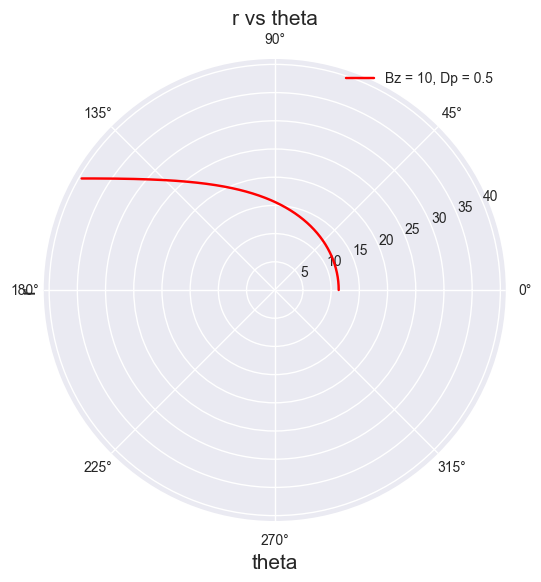

In [85]:
theta = np.linspace(0, 150, 1000) * np.pi / 180
r = r0(10, 0.5) * ((2/(1+np.cos(theta)))**(alpha(10, 0.5)))

# plot the function
plt.figure(figsize = (10, 6))
plt.polar(theta, r, 'r-', label = 'Bz = 10, Dp = 0.5')
plt.title('r vs theta', fontsize = 15)
plt.xlabel('theta', fontsize = 15)
plt.ylabel('r', fontsize = 15)
plt.legend()
plt.show()

In [86]:
mp = pd.read_csv('mp.csv')
mp = mp.drop(columns = ['year1', 'month1', 'day1', 'hour1','minute1', 'second1', \
    'year2', 'month2', 'day2', 'hour2', 'minute2', 'second2', 'probe', 'inbound'])
mp.dropna(inplace = True)
mp.reset_index(drop = True, inplace = True)
mp

mp_xx   mp_yy  mp_zz  she_bx  she_by  she_bz  sph_bx  sph_by  sph_bz  \
0    10.760   0.821  4.881     1.4    19.3    -2.7   -20.5    -1.5    30.8   
1     9.071  -9.059  6.724    13.1     6.6   -17.4   -11.3    13.1    26.5   
2     6.360  -6.419  7.708    -9.6   -22.7    -1.6   -18.2    13.0    32.0   
3    10.250  -0.842  4.746     4.0     8.0    -9.6   -19.0    -0.4    51.9   
4     4.770  -6.258  8.230    -9.9   -11.8     3.2   -15.6    21.6    20.7   
..      ...     ...    ...     ...     ...     ...     ...     ...     ...   
595   8.669   5.250 -1.586    -1.2   -13.7   -32.9    10.0    -1.5    64.6   
596   8.900  -4.021  3.065    23.5    53.5   -14.1    -8.3    35.8    72.4   
597   6.741  -5.838  2.954     1.6    16.5   -33.7   -28.5     3.1    64.9   
598   8.908  -4.021  3.066    23.3    53.7   -14.3    -8.8    37.0    74.6   
599  -5.914 -15.750 -6.454     5.7     0.4     7.9   -27.5   -14.5     8.1   

     imf_bx  imf_by  imf_bz  sw_np  sw_vt  
0      0.67    2.09   -0.75   5.38  329.0  
1     -3.19    3.81   -3.18   2.77  409.0  
2      0.70   -4.67    0.64  14.43  336.2  
3      6.00    0.23    1.29   3.99  414.7  
4      2.22   -3.20    2.52   7.20  390.3  
..      ...     ...     ...    ...    ...  
595   -1.90    1.23   -3.66   2.63  743.3  
596   11.22    4.65   13.68  10.81  400.8  
597  -10.01    4.60   -2.95   8.09  536.0  
598   11.22    4.65   13.68  10.81  400.8  
599   -1.80    1.83    2.23  10.71  403.3  

[600 rows x 14 columns]

In [87]:
mp.drop(columns = ['she_bx', 'she_by', 'she_bz', 'sph_bx', 'sph_by', 'sph_bz', 'imf_bx', 'imf_by'], inplace = True)
mp

mp_xx   mp_yy  mp_zz  imf_bz  sw_np  sw_vt
0    10.760   0.821  4.881   -0.75   5.38  329.0
1     9.071  -9.059  6.724   -3.18   2.77  409.0
2     6.360  -6.419  7.708    0.64  14.43  336.2
3    10.250  -0.842  4.746    1.29   3.99  414.7
4     4.770  -6.258  8.230    2.52   7.20  390.3
..      ...     ...    ...     ...    ...    ...
595   8.669   5.250 -1.586   -3.66   2.63  743.3
596   8.900  -4.021  3.065   13.68  10.81  400.8
597   6.741  -5.838  2.954   -2.95   8.09  536.0
598   8.908  -4.021  3.066   13.68  10.81  400.8
599  -5.914 -15.750 -6.454    2.23  10.71  403.3

[600 rows x 6 columns]

In [88]:
mp['r_real'] = np.sqrt(mp['mp_xx']**2 + mp['mp_yy']**2 + mp['mp_zz']**2)
mp

mp_xx   mp_yy  mp_zz  imf_bz  sw_np  sw_vt     r_real
0    10.760   0.821  4.881   -0.75   5.38  329.0  11.843809
1     9.071  -9.059  6.724   -3.18   2.77  409.0  14.476211
2     6.360  -6.419  7.708    0.64  14.43  336.2  11.877139
3    10.250  -0.842  4.746    1.29   3.99  414.7  11.326782
4     4.770  -6.258  8.230    2.52   7.20  390.3  11.386324
..      ...     ...    ...     ...    ...    ...        ...
595   8.669   5.250 -1.586   -3.66   2.63  743.3  10.258141
596   8.900  -4.021  3.065   13.68  10.81  400.8  10.235852
597   6.741  -5.838  2.954   -2.95   8.09  536.0   9.394117
598   8.908  -4.021  3.066   13.68  10.81  400.8  10.243108
599  -5.914 -15.750 -6.454    2.23  10.71  403.3  18.019212

[600 rows x 7 columns]

In [89]:
mp['Dp'] = mp['sw_vt']**2*mp['sw_np']*1.67*10**(-6)
mp

mp_xx   mp_yy  mp_zz  imf_bz  sw_np  sw_vt     r_real        Dp
0    10.760   0.821  4.881   -0.75   5.38  329.0  11.843809  0.972502
1     9.071  -9.059  6.724   -3.18   2.77  409.0  14.476211  0.773825
2     6.360  -6.419  7.708    0.64  14.43  336.2  11.877139  2.723819
3    10.250  -0.842  4.746    1.29   3.99  414.7  11.326782  1.145928
4     4.770  -6.258  8.230    2.52   7.20  390.3  11.386324  1.831665
..      ...     ...    ...     ...    ...    ...        ...       ...
595   8.669   5.250 -1.586   -3.66   2.63  743.3  10.258141  2.426613
596   8.900  -4.021  3.065   13.68  10.81  400.8  10.235852  2.899997
597   6.741  -5.838  2.954   -2.95   8.09  536.0   9.394117  3.881455
598   8.908  -4.021  3.066   13.68  10.81  400.8  10.243108  2.899997
599  -5.914 -15.750 -6.454    2.23  10.71  403.3  18.019212  2.909125

[600 rows x 8 columns]

In [90]:
mp['theta'] = np.arctan2(mp['mp_yy'], mp['mp_xx'])
mp

mp_xx   mp_yy  mp_zz  imf_bz  sw_np  sw_vt     r_real        Dp  \
0    10.760   0.821  4.881   -0.75   5.38  329.0  11.843809  0.972502   
1     9.071  -9.059  6.724   -3.18   2.77  409.0  14.476211  0.773825   
2     6.360  -6.419  7.708    0.64  14.43  336.2  11.877139  2.723819   
3    10.250  -0.842  4.746    1.29   3.99  414.7  11.326782  1.145928   
4     4.770  -6.258  8.230    2.52   7.20  390.3  11.386324  1.831665   
..      ...     ...    ...     ...    ...    ...        ...       ...   
595   8.669   5.250 -1.586   -3.66   2.63  743.3  10.258141  2.426613   
596   8.900  -4.021  3.065   13.68  10.81  400.8  10.235852  2.899997   
597   6.741  -5.838  2.954   -2.95   8.09  536.0   9.394117  3.881455   
598   8.908  -4.021  3.066   13.68  10.81  400.8  10.243108  2.899997   
599  -5.914 -15.750 -6.454    2.23  10.71  403.3  18.019212  2.909125   

        theta  
0    0.076154  
1   -0.784736  
2   -0.790015  
3   -0.081962  
4   -0.919517  
..        ...  
595  0.544532  
596 -0.424348  
597 -0.713735  
598 -0.424011  
599 -1.929998  

[600 rows x 9 columns]

In [91]:
test = mp[['imf_bz', 'Dp', 'r_real', 'theta']]
test

imf_bz        Dp     r_real     theta
0     -0.75  0.972502  11.843809  0.076154
1     -3.18  0.773825  14.476211 -0.784736
2      0.64  2.723819  11.877139 -0.790015
3      1.29  1.145928  11.326782 -0.081962
4      2.52  1.831665  11.386324 -0.919517
..      ...       ...        ...       ...
595   -3.66  2.426613  10.258141  0.544532
596   13.68  2.899997  10.235852 -0.424348
597   -2.95  3.881455   9.394117 -0.713735
598   13.68  2.899997  10.243108 -0.424011
599    2.23  2.909125  18.019212 -1.929998

[600 rows x 4 columns]

In [94]:
# define shue's r0 and alpha
def r0_shue(Bz, P):
    return (10.22 + 1.29*np.tanh(0.184*(Bz + 8.14)))*(P ** (-1/6.6))
            
def alpha_shue(Bz, P):
    return (0.58 - 0.007*Bz)*(1 + 0.024*np.log(P))

def r_shue(Bz, P, theta):
    return r0_shue(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_shue(Bz, P)))
test['r_pred_shue'] = r_shue(test['imf_bz'], test['Dp'], test['theta'])
test

imf_bz        Dp     r_real     theta  r_pred_shue
0     -0.75  0.972502  11.843809  0.076154    11.408201
1     -3.18  0.773825  14.476211 -0.784736    12.744176
2      0.64  2.723819  11.877139 -0.790015    10.775657
3      1.29  1.145928  11.326782 -0.081962    11.209415
4      2.52  1.831665  11.386324 -0.919517    11.849185
..      ...       ...        ...       ...          ...
595   -3.66  2.426613  10.258141  0.544532    10.160437
596   13.68  2.899997  10.235852 -0.424348    10.017663
597   -2.95  3.881455   9.394117 -0.713735     9.866164
598   13.68  2.899997  10.243108 -0.424011    10.017302
599    2.23  2.909125  18.019212 -1.929998    18.700206

[600 rows x 5 columns]

In [96]:
def r(Bz, P, theta):
    return r0(Bz, P) * ((2/(1+np.cos(theta)))**(alpha(Bz, P)))
test['r_pred_hou'] = r(test['imf_bz'], test['Dp'], test['theta'])
test

imf_bz        Dp     r_real     theta  r_pred_shue  r_pred_hou
0     -0.75  0.972502  11.843809  0.076154    11.408201   11.237109
1     -3.18  0.773825  14.476211 -0.784736    12.744176   12.515959
2      0.64  2.723819  11.877139 -0.790015    10.775657   10.381731
3      1.29  1.145928  11.326782 -0.081962    11.209415   10.959813
4      2.52  1.831665  11.386324 -0.919517    11.849185   11.373913
..      ...       ...        ...       ...          ...         ...
595   -3.66  2.426613  10.258141  0.544532    10.160437   10.026577
596   13.68  2.899997  10.235852 -0.424348    10.017663    8.698213
597   -2.95  3.881455   9.394117 -0.713735     9.866164    9.623265
598   13.68  2.899997  10.243108 -0.424011    10.017302    8.697875
599    2.23  2.909125  18.019212 -1.929998    18.700206   17.293191

[600 rows x 6 columns]

In [97]:
# Cacluate the RMSE of the prediction of r
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('RMSE of the prediction of r by Shue et al. (1998)=', rmse(test['r_pred_shue'], test['r_real']))
print('RMSE of the prediction of r by Hou et al. (2023)=', rmse(test['r_pred_hou'], test['r_real']))

RMSE of the prediction of r by Shue et al. (1998)= 1.3475448753503767
RMSE of the prediction of r by Hou et al. (2023)= 1.3378271169258527


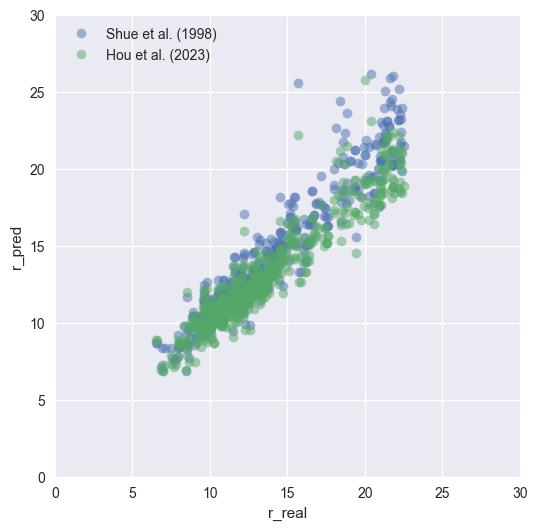

In [98]:
plt.figure(figsize = (6, 6))
plt.plot(test['r_real'], test['r_pred_shue'], 'o', label = 'Shue et al. (1998)', alpha = 0.5)
plt.plot(test['r_real'], test['r_pred_hou'], 'o', label = 'Hou et al. (2023)', alpha = 0.5)
plt.xlabel('r_real')
plt.ylabel('r_pred')
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

In [100]:
# make a 2D plane of r_pred_hou for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0, 60, 100)

Bz, P = np.meshgrid(Bz, P)

r_pred_hou_list = r(Bz, P, 0)
r_pred_hou_list.shape

(100, 100)

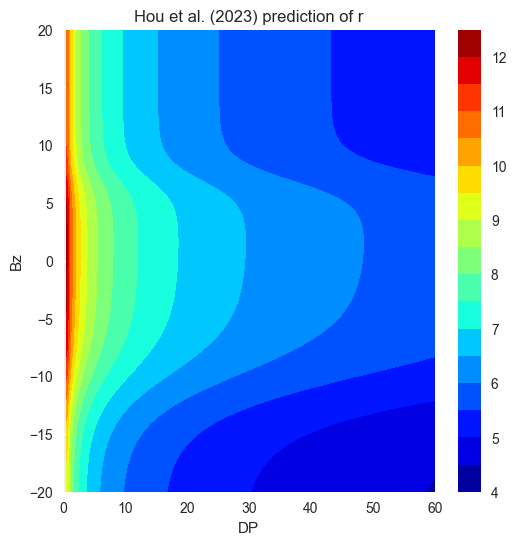

In [101]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_hou_list, 15, cmap = 'jet')
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('Hou et al. (2023) prediction of r')
plt.show()

In [102]:
r_pred_shue_list = r_shue(Bz, P, 0)
r_pred_shue_list.shape

(100, 100)

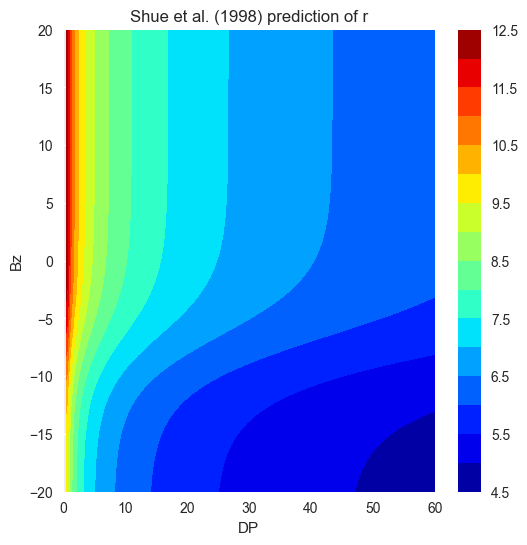

In [103]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_shue_list, 15, cmap = 'jet')
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('Shue et al. (1998) prediction of r')
plt.show()